# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

#! curl -O https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [1]:
from collections import defaultdict
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

# Преобразуем датасет к датафрейму
data_df = pd.DataFrame(data)
target_df = pd.DataFrame(target)

print("Обучающая выборка:")
display(data_df.head())

print("Таргет выборка:")
display(target_df.head())

(846, 19) (846,)
Обучающая выборка:


0    1   2    3    4    5   6    7   8   9    10   11   12   13   14  15  \
0   0   95  48   83  178   72  10  162  42  20  159  176  379  184   70   6   
1   1   91  41   84  141   57   9  149  45  19  143  170  330  158   72   9   
2   2  104  50  106  209   66  10  207  32  23  158  223  635  220   73  14   
3   3   93  41   82  159   63   9  144  46  19  143  160  309  127   63   6   
4   4   85  44   70  205  103  52  149  45  19  144  241  325  188  127   9   

   16   17   18  
0  16  187  197  
1  14  189  199  
2   9  188  196  
3  10  199  207  
4  11  180  183

Таргет выборка:


0
0   van
1   van
2  saab
3   van
4   bus

In [3]:
data_df.describe()

0           1           2           3           4           5   \
count  846.000000  846.000000  846.000000  846.000000  846.000000  846.000000   
mean   422.500000   93.678487   44.861702   82.088652  168.940898   61.693853   
std    244.363459    8.234474    6.169866   15.771533   33.472183    7.888251   
min      0.000000   73.000000   33.000000   40.000000  104.000000   47.000000   
25%    211.250000   87.000000   40.000000   70.000000  141.000000   57.000000   
50%    422.500000   93.000000   44.000000   80.000000  167.000000   61.000000   
75%    633.750000  100.000000   49.000000   98.000000  195.000000   65.000000   
max    845.000000  119.000000   59.000000  112.000000  333.000000  138.000000   

               6           7           8           9           10          11  \
count  846.000000  846.000000  846.000000  846.000000  846.000000  846.000000   
mean     8.567376  168.839243   40.933806   20.582742  147.998818  188.625296   
std      4.601217   33.244978    7.811560    2.592138   14.515652   31.394837   
min      2.000000  112.000000   26.000000   17.000000  118.000000  130.000000   
25%      7.000000  146.250000   33.000000   19.000000  137.000000  167.000000   
50%      8.000000  157.000000   43.000000   20.000000  146.000000  178.500000   
75%     10.000000  198.000000   46.000000   23.000000  159.000000  217.000000   
max     55.000000  265.000000   61.000000   29.000000  188.000000  320.000000   

                12         13          14          15          16          17  \
count   846.000000  846.00000  846.000000  846.000000  846.000000  846.000000   
mean    439.911348  174.70331   72.462175    6.377069   12.599291  188.932624   
std     176.692614   32.54649    7.486974    4.918353    8.931240    6.163949   
min     184.000000  109.00000   59.000000    0.000000    0.000000  176.000000   
25%     318.250000  149.00000   67.000000    2.000000    5.000000  184.000000   
50%     364.000000  173.00000   71.500000    6.000000   11.000000  188.000000   
75%     587.000000  198.00000   75.000000    9.000000   19.000000  193.000000   
max    1018.000000  268.00000  135.000000   22.000000   41.000000  206.000000   

               18  
count  846.000000  
mean   195.632388  
std      7.438797  
min    181.000000  
25%    190.250000  
50%    197.000000  
75%    201.000000  
max    211.000000

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       846 non-null    int64
 1   1       846 non-null    int64
 2   2       846 non-null    int64
 3   3       846 non-null    int64
 4   4       846 non-null    int64
 5   5       846 non-null    int64
 6   6       846 non-null    int64
 7   7       846 non-null    int64
 8   8       846 non-null    int64
 9   9       846 non-null    int64
 10  10      846 non-null    int64
 11  11      846 non-null    int64
 12  12      846 non-null    int64
 13  13      846 non-null    int64
 14  14      846 non-null    int64
 15  15      846 non-null    int64
 16  16      846 non-null    int64
 17  17      846 non-null    int64
 18  18      846 non-null    int64
dtypes: int64(19)
memory usage: 125.7 KB


> Все данные имеют числовой формат и судя по-всему 0 фит это индекс, дропнем его.

In [5]:
data_df = data_df.drop(columns=0)

In [6]:
# Проверим наличие пропусков в данных
data_df.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

> Пропусков нет

In [7]:
data_df[data_df.duplicated()]

Empty DataFrame
Columns: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Index: []

> Дублей нет

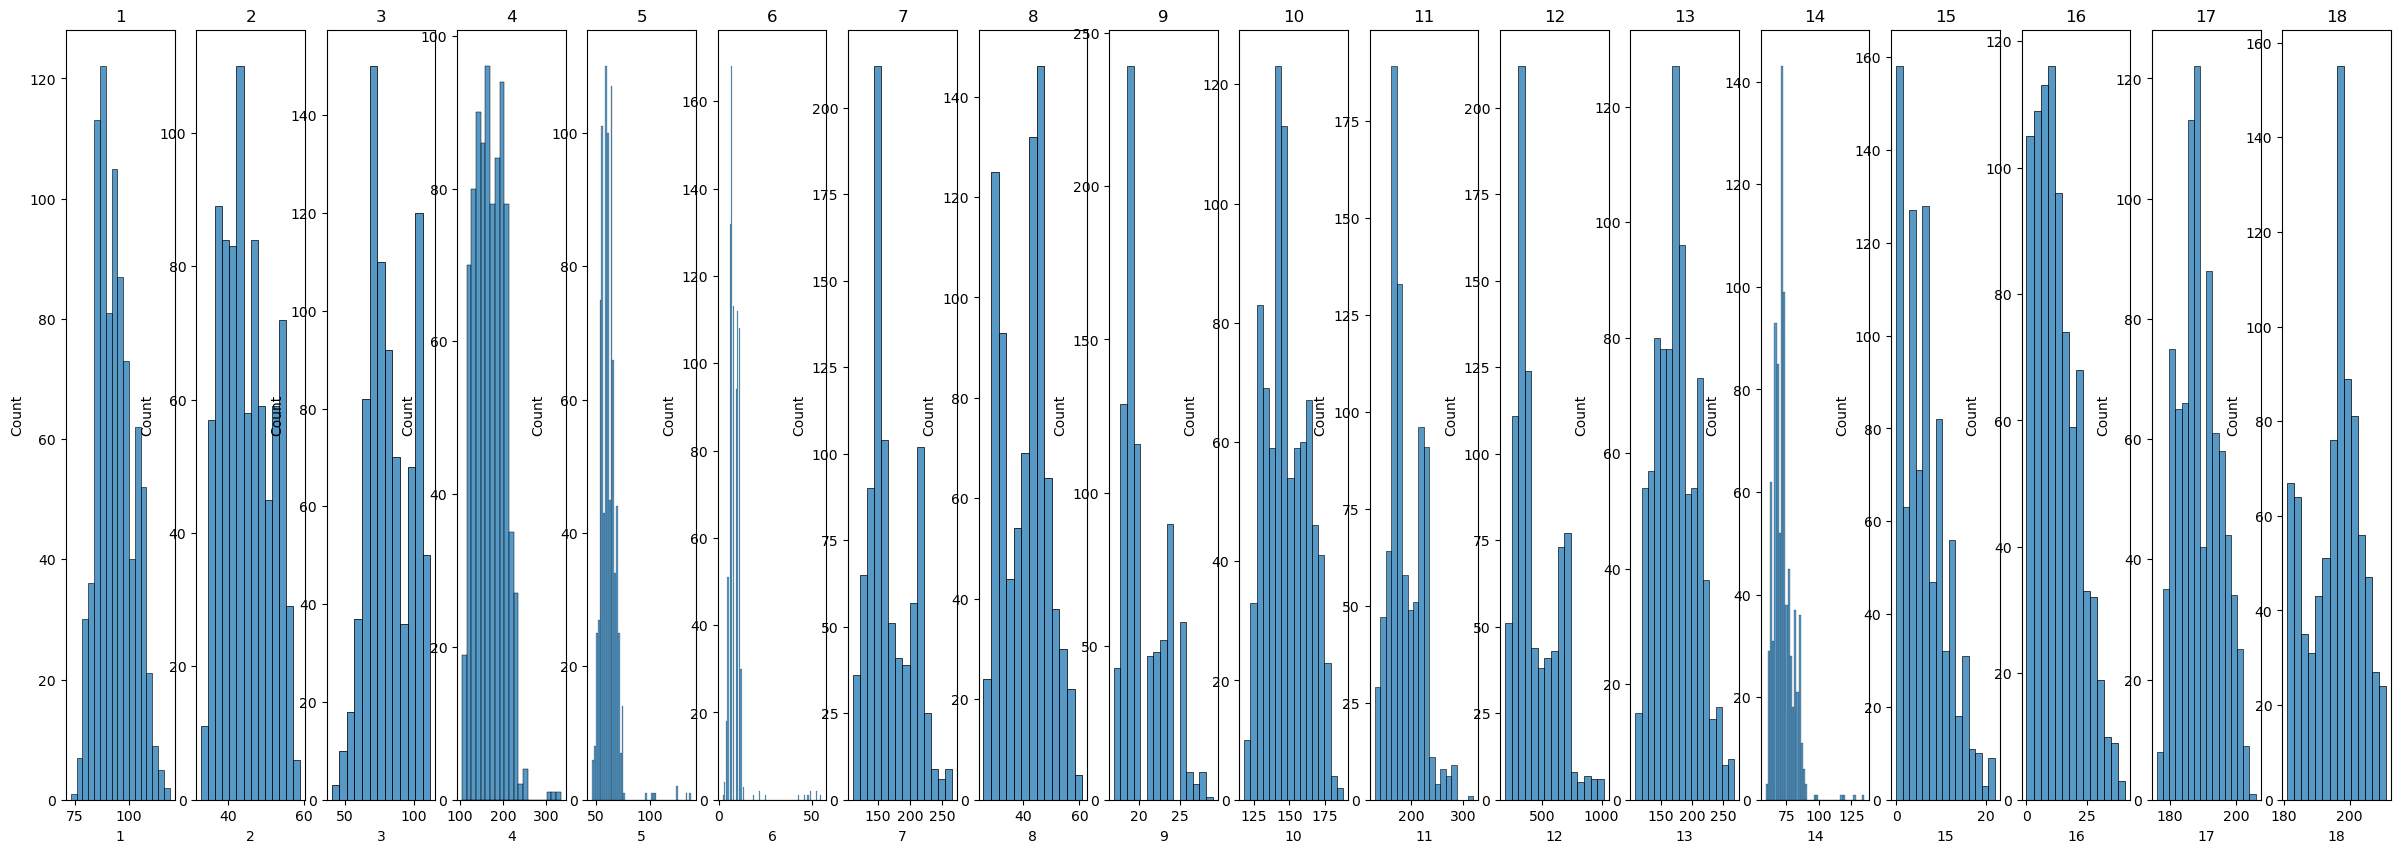

In [8]:
num_columns = len(data_df.columns)

# Создание подграфиков
fig, axes = plt.subplots(1, num_columns, figsize=(30, 10))

# Обход всех колонок и построение боксплота для каждой из них
for i, column in enumerate(data_df.columns):
    sns.histplot(data=data_df[column], ax=axes[i])
    axes[i].set_title(column)

# Отображение графиков
# plt.tight_layout()
plt.show()

> Признаки явно приходят из различных распределений. Часть признаков имеют явную мультимодальность и, вероятно, логнормальное распределение, следовательно лонарифмирование признаков может привести их распределение ближе к нормальному.


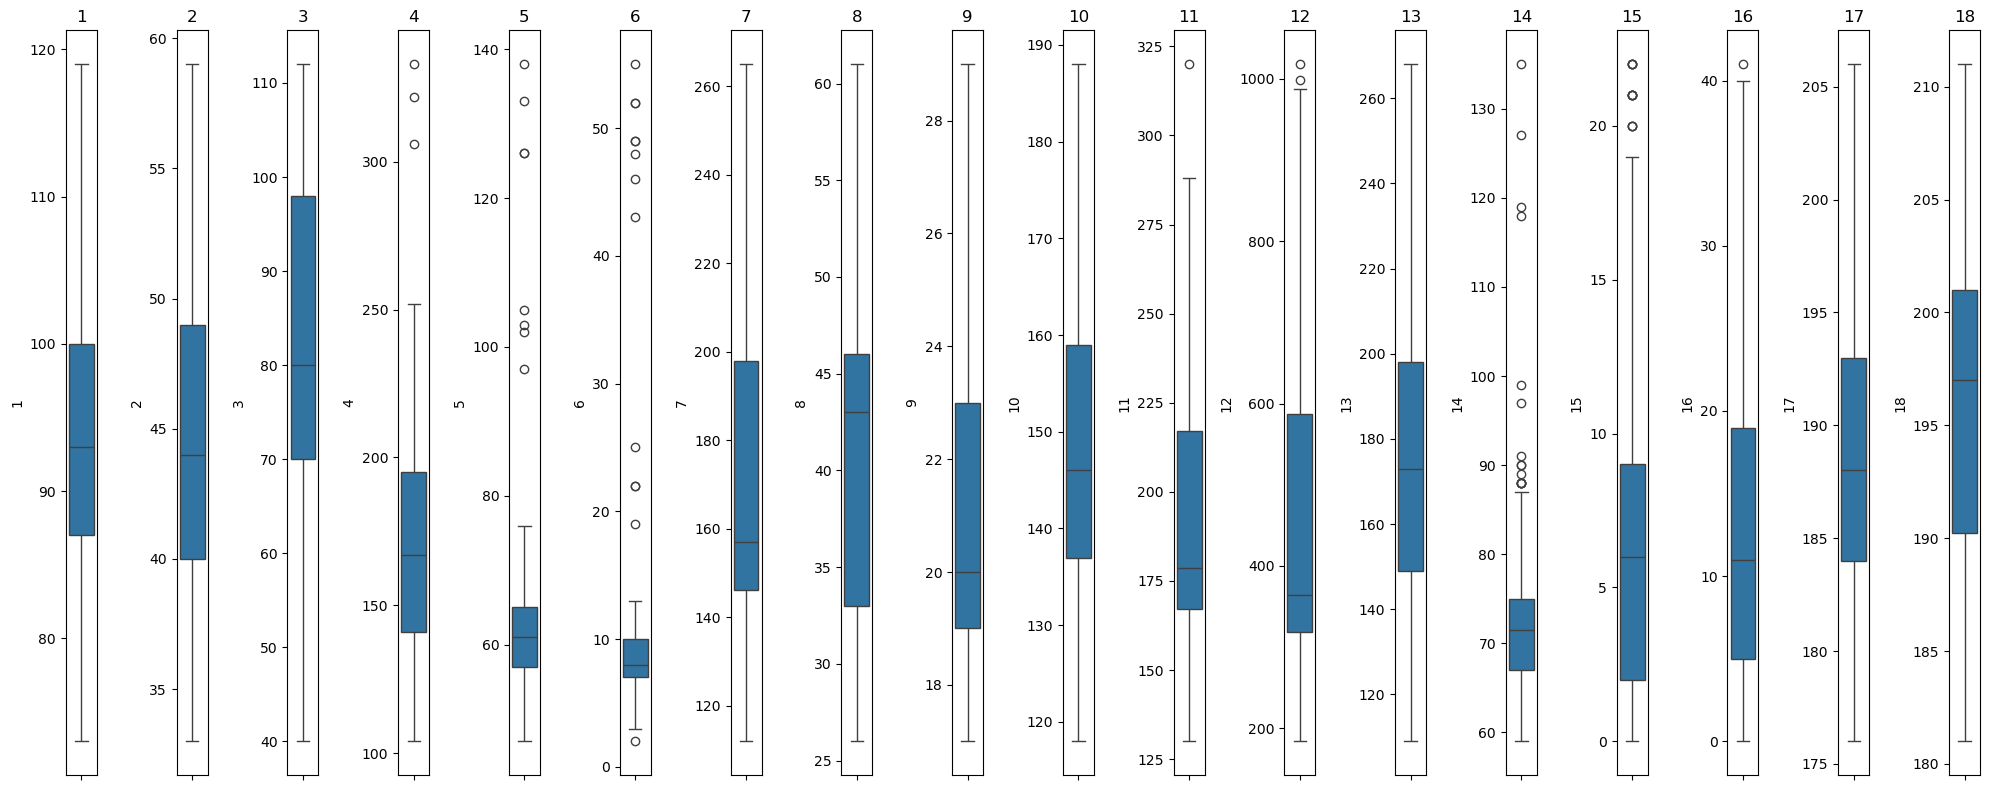

In [9]:
# Создание подграфиков
fig, axes = plt.subplots(1, num_columns, figsize=(20, 8))

# Обход всех колонок и построение боксплота для каждой из них
for i, column in enumerate(data_df.columns):
    sns.boxplot(data=data_df[column], ax=axes[i])
    axes[i].set_title(column)

# Отображение графиков
plt.tight_layout()
plt.show()

> По ряду признаков существует вероятность наличия выбросов. Нужно проверить их наличие после процедуры логарифмирования.

In [10]:
# Закодируем таргет
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target_df)
y_target = pd.DataFrame(y, columns=["target"])
y_target.value_counts()

target
0         218
2         217
1         212
3         199
Name: count, dtype: int64

> Классы сбалансированы

In [12]:
# Склеим датасет для очистки выбросов
data = pd.concat([data_df, y_target], axis=1)

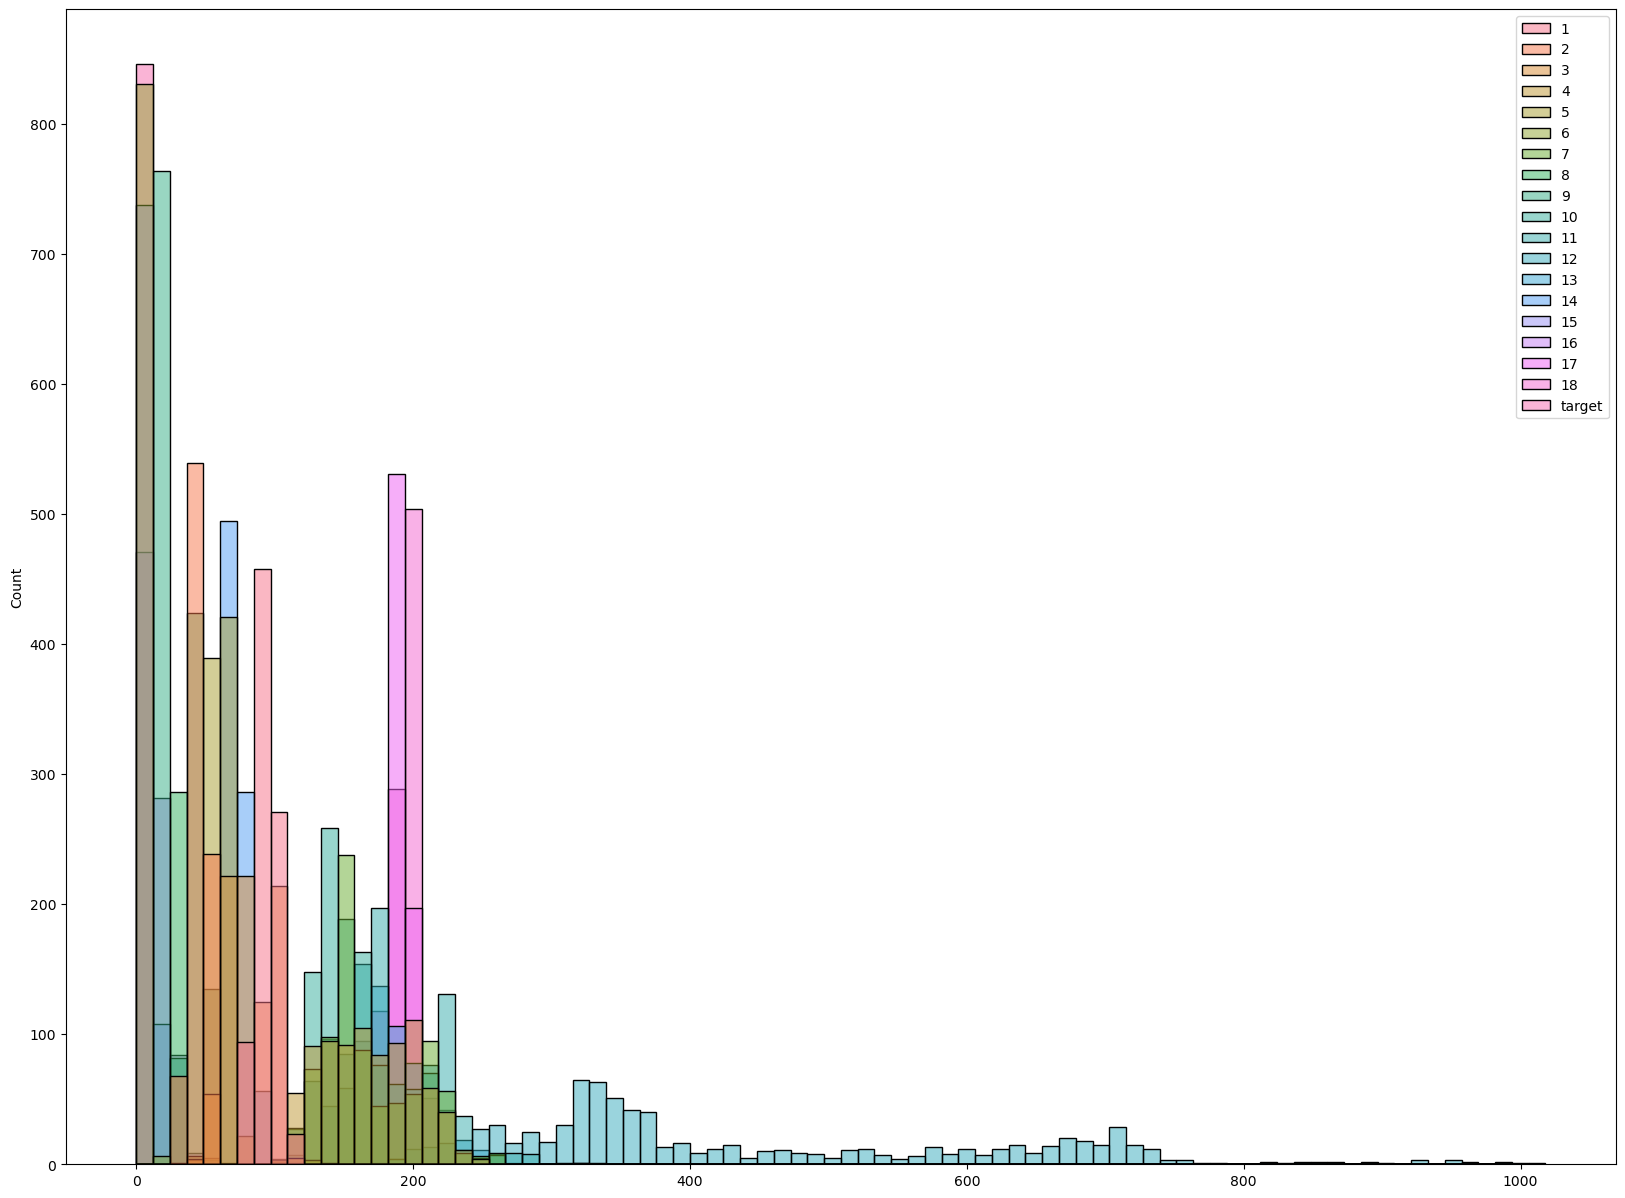

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(20, 15))
sns.histplot(data=data, ax=axes)
plt.show()

> Можно наблюдать различие масштабов признаков - требуется нормальнизация.

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [17]:
# Опять разведем таргет и фиты для логарифмирования
X = data.drop(columns=['target'])
y = data['target']

In [18]:
# Придется создать класс логтрасформера для включения в пайплайн (если вдруг будем включать в пайп)
class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transf = X.copy()
        # прикольный метод завместо np.log(x+1)
        X_transf = np.log1p(X_transf)
        return X_transf

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

In [19]:
log_transformer = LogTransformer()

data_df_log = X.copy()

data_df_log = log_transformer.fit_transform(X)

data_df_log.head()

1         2         3         4         5         6         7  \
0  4.564348  3.891820  4.430817  5.187386  4.290459  2.397895  5.093750   
1  4.521789  3.737670  4.442651  4.955827  4.060443  2.302585  5.010635   
2  4.653960  3.931826  4.672829  5.347108  4.204693  2.397895  5.337538   
3  4.543295  3.737670  4.418841  5.075174  4.158883  2.302585  4.976734   
4  4.454347  3.806662  4.262680  5.327876  4.644391  3.970292  5.010635   

          8         9        10        11        12        13        14  \
0  3.761200  3.044522  5.075174  5.176150  5.940171  5.220356  4.262680   
1  3.828641  2.995732  4.969813  5.141664  5.802118  5.068904  4.290459   
2  3.496508  3.178054  5.068904  5.411646  6.455199  5.398163  4.304065   
3  3.850148  2.995732  4.969813  5.081404  5.736572  4.852030  4.158883   
4  3.828641  2.995732  4.976734  5.488938  5.786897  5.241747  4.852030   

         15        16        17        18  
0  1.945910  2.833213  5.236442  5.288267  
1  2.302585  2.708050  5.247024  5.298317  
2  2.708050  2.302585  5.241747  5.283204  
3  1.945910  2.397895  5.298317  5.337538  
4  2.302585  2.484907  5.198497  5.214936

In [20]:
data_df_log = pd.concat([data_df_log, y], axis=1)
data_df_log.shape
display(data_df_log.head())

1         2         3         4         5         6         7  \
0  4.564348  3.891820  4.430817  5.187386  4.290459  2.397895  5.093750   
1  4.521789  3.737670  4.442651  4.955827  4.060443  2.302585  5.010635   
2  4.653960  3.931826  4.672829  5.347108  4.204693  2.397895  5.337538   
3  4.543295  3.737670  4.418841  5.075174  4.158883  2.302585  4.976734   
4  4.454347  3.806662  4.262680  5.327876  4.644391  3.970292  5.010635   

          8         9        10        11        12        13        14  \
0  3.761200  3.044522  5.075174  5.176150  5.940171  5.220356  4.262680   
1  3.828641  2.995732  4.969813  5.141664  5.802118  5.068904  4.290459   
2  3.496508  3.178054  5.068904  5.411646  6.455199  5.398163  4.304065   
3  3.850148  2.995732  4.969813  5.081404  5.736572  4.852030  4.158883   
4  3.828641  2.995732  4.976734  5.488938  5.786897  5.241747  4.852030   

         15        16        17        18  target  
0  1.945910  2.833213  5.236442  5.288267       3  
1  2.302585  2.708050  5.247024  5.298317       3  
2  2.708050  2.302585  5.241747  5.283204       2  
3  1.945910  2.397895  5.298317  5.337538       3  
4  2.302585  2.484907  5.198497  5.214936       0

Выведем графики для понимания как сработало логарифмирование на признаки

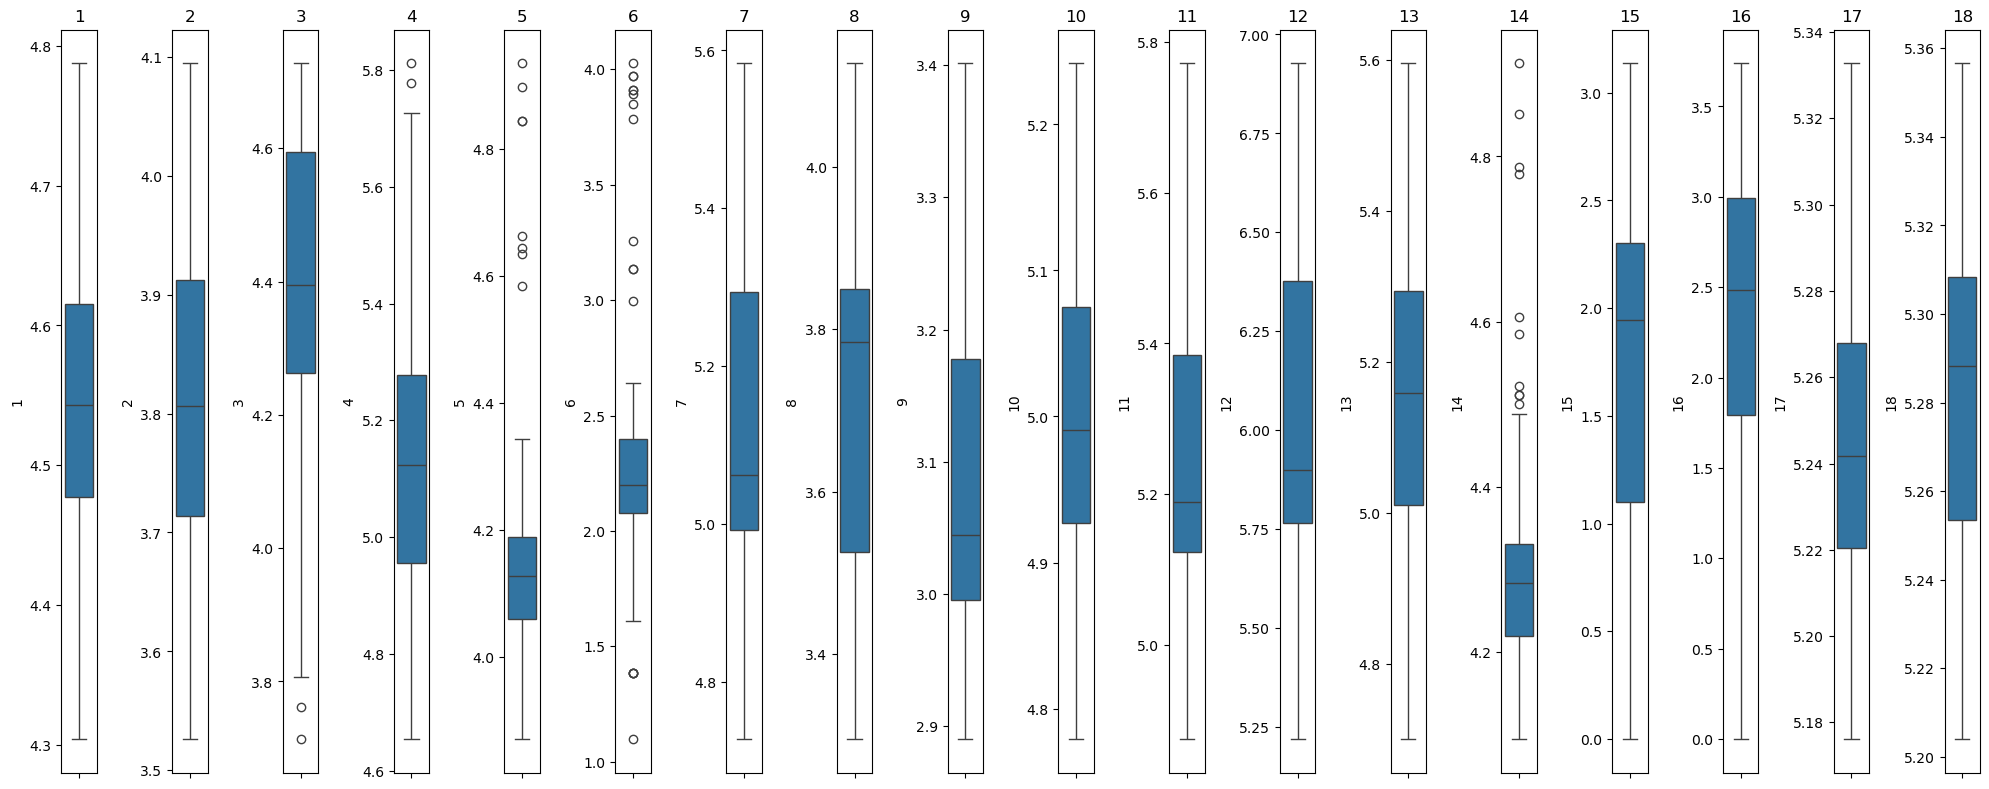

In [21]:
# Создание подграфиков
fig, axes = plt.subplots(1, num_columns, figsize=(20, 8))

# Обход всех колонок и построение боксплота для каждой из них
for i, column in enumerate(data_df_log.columns[:-1]):
    sns.boxplot(data=data_df_log[column], ax=axes[i])
    axes[i].set_title(column)

# Отображение графиков
plt.tight_layout()
plt.show()

> Можно наблюдать снижение количества признаков по которым вероятно существуют выбросы, в частности в признаках 4, 5, 6, 14. Так как у нас нет интерпретации их значений (возможно это не выбросы а характерные аномалии), и после логарифмирования мы снизили масштаб признакового пространства (что снизит влияние выбросов), то для base-line модели я решил не чистить эти фичи.

In [22]:
data_df_log.shape

(846, 19)

Проведем анализ на мультиколлинеарность признаков и влияние на таргет, для последующих этапов.

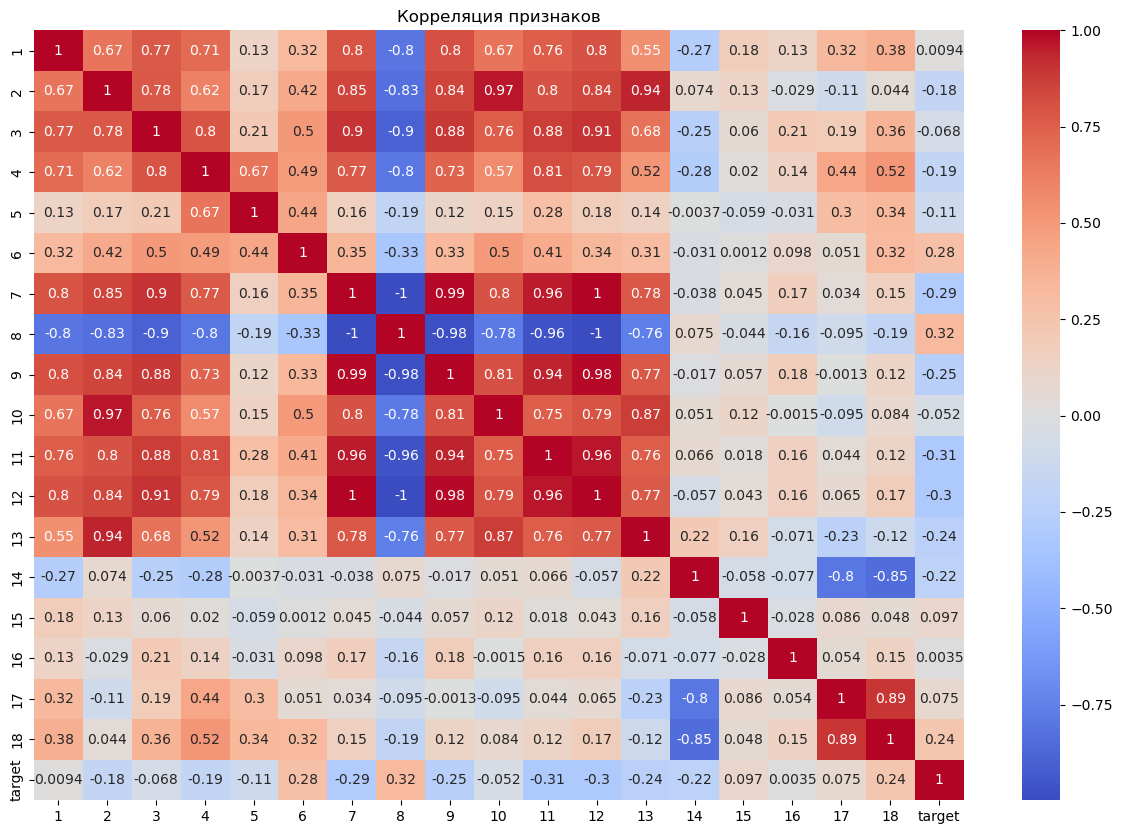

In [23]:
# Создадим комбинированный датафрейм
# heat_df = pd.concat([data_df_log, y_target], axis=1)

fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(data_df_log.corr(), annot=True, ax=axes, cmap='coolwarm')
plt.title("Корреляция признаков")
plt.show()

> Корреляция на таргет у признаков не высокая, а вот мультиколлинеарность заметная, что говорит о том, что в простейщем варианте можно было бы дропать фиты, но так как в дальнейших заданиях у нас имеется метод главных компонент, выявим подмножество/ва признаков для этапа PCA.


In [26]:
# Вычисление высококоррелированных пар (по заданному порогу)
threshold = 0.8
high_corr_pairs = []
for i in range(len(data_df_log.corr().columns)):
    for j in range(i):
        if abs(data_df_log.corr().iloc[i, j]) > threshold:
            high_corr_pairs.append((data_df_log.corr().columns[i], data_df_log.corr(
            ).columns[j], data_df_log.corr().iloc[i, j]))

# Функция для поиска связных компонент (групп)


def find_connected_components(pairs):
    graph = defaultdict(list)
    # Строим граф
    for x, y, _ in pairs:
        graph[x].append(y)
        graph[y].append(x)

    visited = set()
    groups = []

    # Поиск в глубину (DFS) для нахождения связных компонент
    def dfs(node, component):
        if node not in visited:
            visited.add(node)
            component.append(node)
            for neighbor in graph[node]:
                dfs(neighbor, component)

    for node in graph:
        if node not in visited:
            component = []
            dfs(node, component)
            groups.append(component)

    return groups


# Формирование групп
groups = find_connected_components(high_corr_pairs)

# Вывод результатов
print("Сформированные группы:", groups)

Сформированные группы: [[7, 2, 8, 1, 9, 3, 11, 4, 12, 10, 13], [18, 14, 17]]


> Мы сгруппировали фиты по уровню корреляции в группы для последующего применения PCA на каждой группе в отдельности. 

> Группировка производилась через построение графа на основе порогового значения корреляции по модулю

In [27]:
y_target = data_df_log['target']
data_df = data_df_log.drop(columns=['target'])

In [28]:
# Разобъем на трейн-тест
X_train, X_test, y_train, y_test = train_test_split(
    data_df, y_target, test_size=0.35, random_state=42)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(549, 18) (549,) (297, 18) (297,)


Стандартизируем X_train, X_test

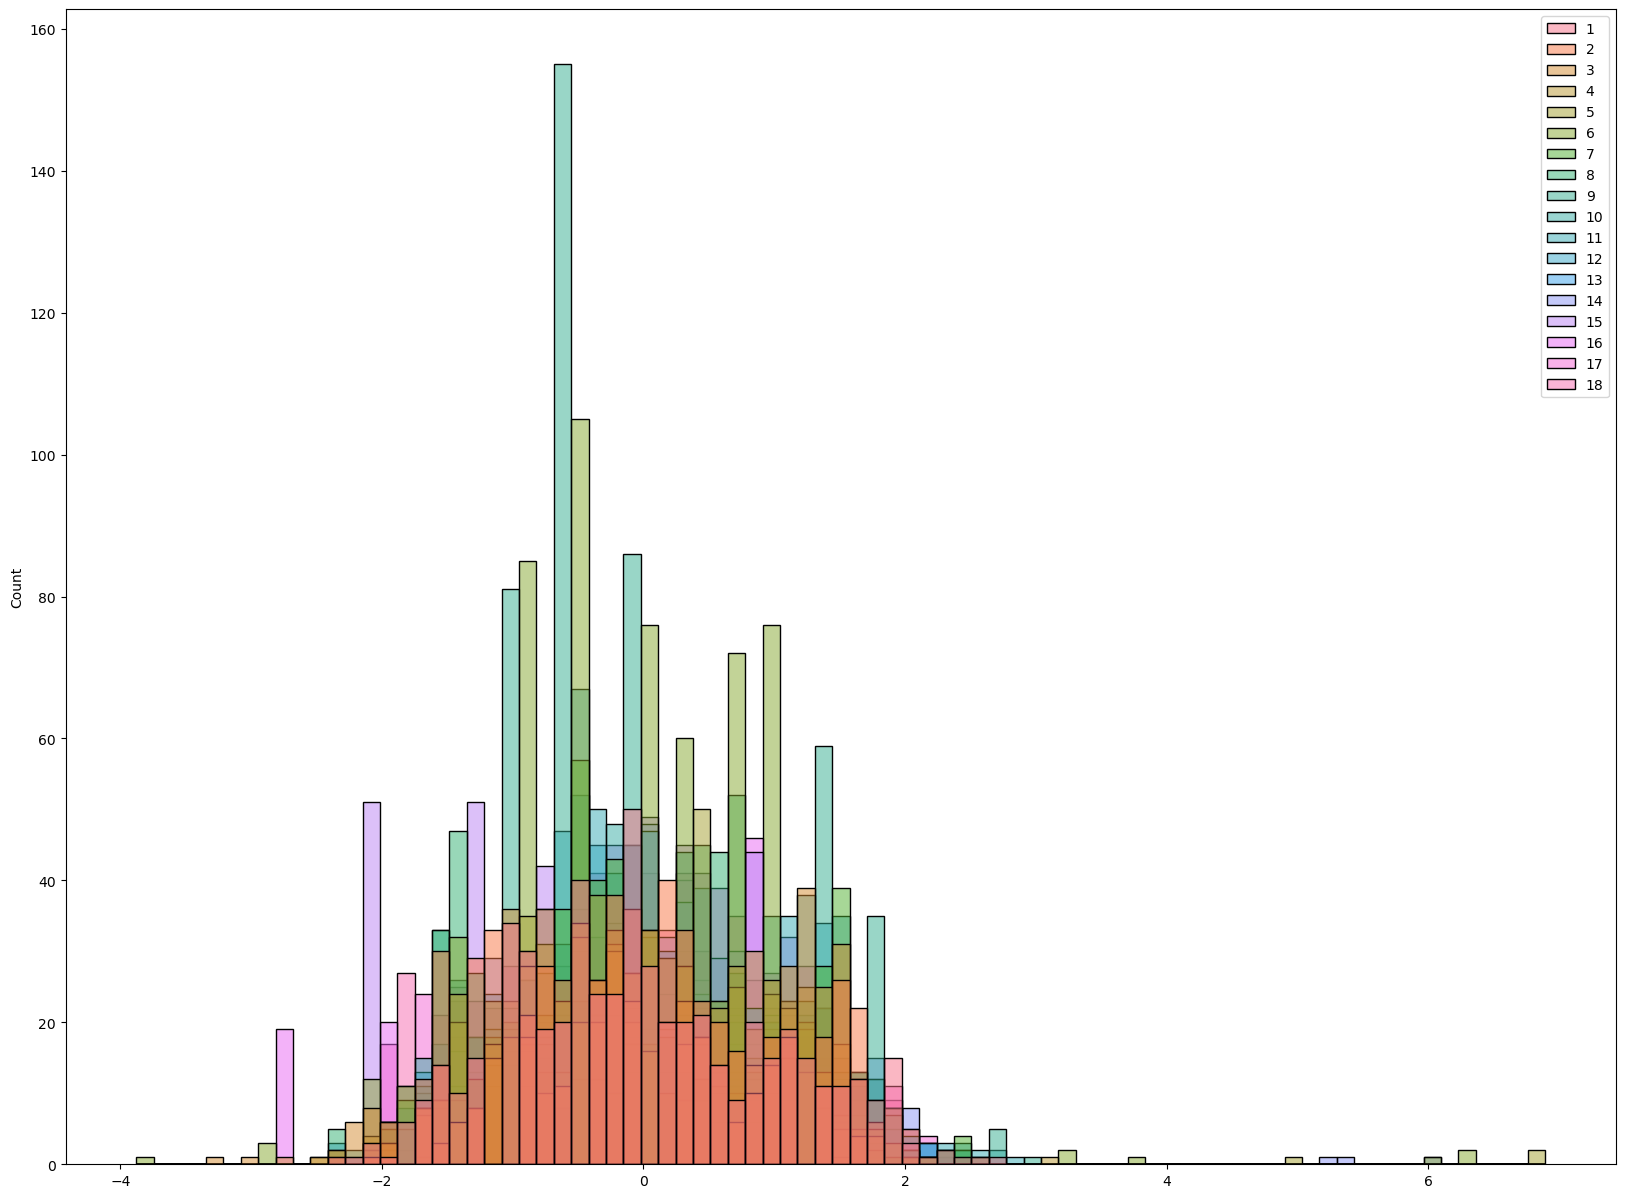

In [29]:
# Инициализируем объект класса скалеров
st_scal = StandardScaler()

# Отскалируем X_train/X_test
X_train_sc = st_scal.fit_transform(X_train)
X_test_sc = st_scal.transform(X_test)

X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

# Посмотрим на распределения на примере трейна
fig, axes = plt.subplots(1, 1, figsize=(20, 15))
sns.histplot(data=X_train_sc, ax=axes)
plt.show()

> Можно видеть, что признаки привидены к +/- одному масштабу и схожему распределению.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [30]:
# YOUR CODE HERE
# Создадим функцию для расчета метрик
def metrics_estimation(y_test, y_pred, y_pred_proba):
    # Расчет f1_score, accuracy_score, roc_auc_score на тесте
    f1_test = np.round(f1_score(y_test, y_pred, average='macro'), 4)
    accuracy_test = np.round(accuracy_score(y_test, y_pred), 4)
    rocauc_sc = np.round(roc_auc_score(
        y_test, y_pred_proba, multi_class='ovr'), 4)

    print(f"F1 на тесте: {f1_test}")
    print(f"Accuracy на тесте: {accuracy_test}")
    print(f"ROC-score на тесте: {rocauc_sc}")

    # Построение ROC-AUC кривой для каждого класса
    n_classes = np.unique(y_test).size  # Получаем количество классов
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Цикл по каждому классу
    for i in range(n_classes):
        # Изменен индекс для бинаризации
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Построение ROC кривых
    plt.figure(figsize=(10, 8))

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i],
                 label=f'ROC-кривая для класса {i} (AUC-площадь = {roc_auc[i]})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(
        'ROC-кривая для мультиклассовой классификации')
    plt.legend()
    plt.grid()
    plt.show()

F1 на тесте: 0.8022
Accuracy на тесте: 0.8081
ROC-score на тесте: 0.9564


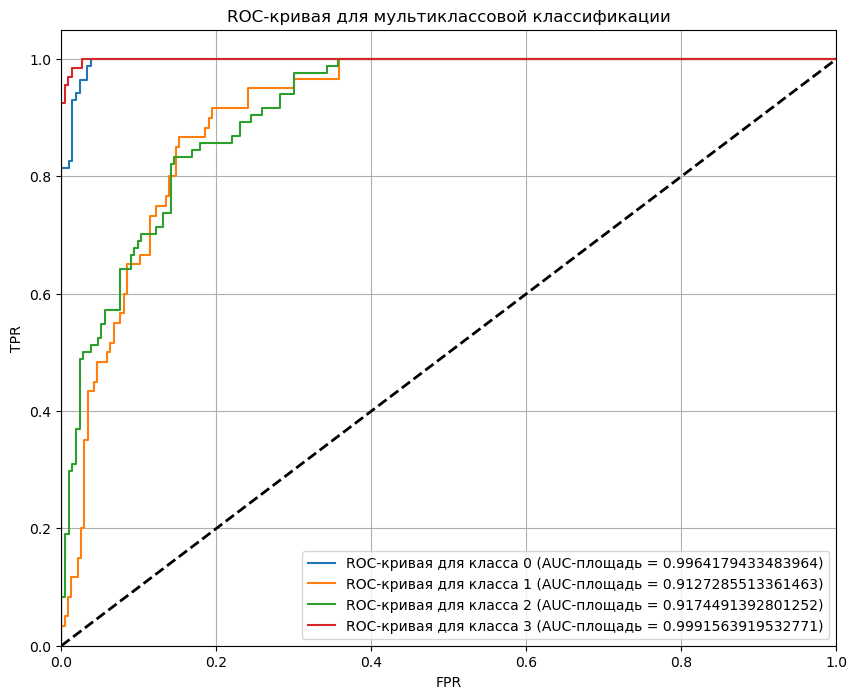

In [31]:

# Используем скорер-мейкеры для использования в
# грид-серче, используем взвешенный расчет
f1 = make_scorer(f1_score, average='weighted')
accuracy = make_scorer(accuracy_score, sample_weigh='weighted')

estimator = LogisticRegression(
    # multi_class="multinomial", # уберу для тушения ворнингов
    solver="saga",
    tol=1e-3,
    max_iter=500,
    n_jobs=-1,
    random_state=42
)

param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': [
        'elasticnet'], 'l1_ratio': [0, 0.5, 1]},
]

# Пройдемся по сетке со скорингом из двух метрик
base_log_reg = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    return_train_score=True,
    scoring=f1,
    n_jobs=-1
)

base_log_reg.fit(X_train_sc, y_train)

# Предсказания на тестовых данных
y_pred = base_log_reg.predict(X_test_sc)
y_pred_proba = base_log_reg.predict_proba(X_test_sc)

# Расчитаем метрики на пожобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)

> Виден дисбаланс в качестве классификации, хотя классы относительно сбалансированы.

F1 на тесте: 0.8039
Accuracy на тесте: 0.8081
ROC-score на тесте: 0.9565


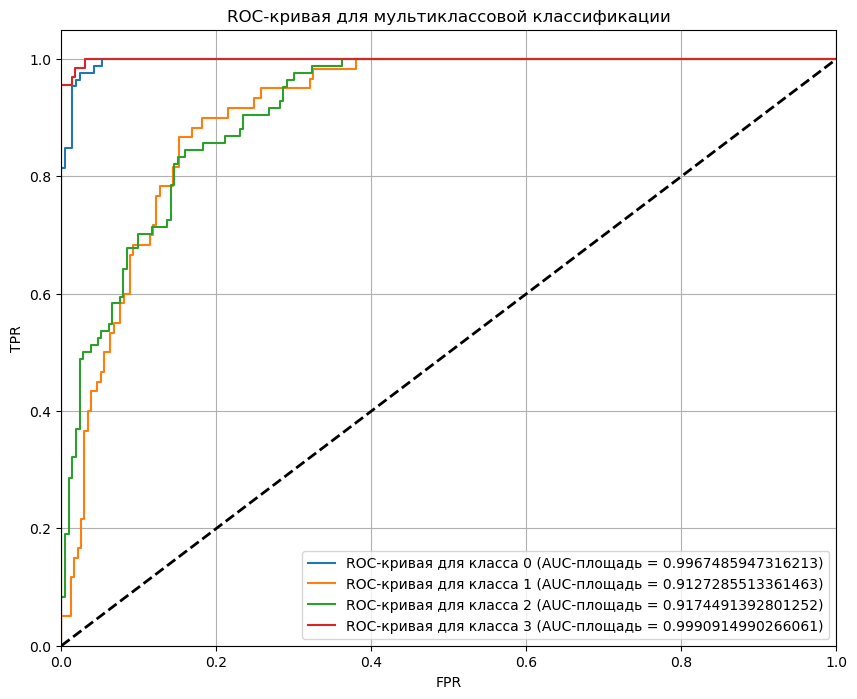

In [32]:
# грид-серче, используем взвешенный расчет
class_weights_options = [
    {0: 0.6, 1: 5, 2: 5, 3: 0.6},
    {0: 1, 1: 1, 2: 1, 3: 1},  # Равные веса для сравнения
    {0: 1, 1: 2, 2: 2, 3: 1}   # Увеличенные веса для классов 1 и 2
]
estimator = LogisticRegression(
    # multi_class="multinomial", # уберу для тушения ворнингов
    solver="saga",
    tol=1e-3,
    max_iter=4000,
    n_jobs=-1,
    random_state=42
)

# Инициализация списка параметров для сетки
param_grid = []
for class_weights in class_weights_options:
    param_grid.append({
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'class_weight': [class_weights]
    })
    param_grid.append({
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1'],
        'class_weight': [class_weights]
    })
    param_grid.append({
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['elasticnet'],
        'l1_ratio': [0, 0.5, 1],
        'class_weight': [class_weights]
    })

# Пройдемся по сетке со скорингом из двух метрик
base_log_reg_weighted = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    return_train_score=True,
    scoring=f1,
    n_jobs=-1
)

base_log_reg_weighted.fit(X_train_sc, y_train)

# Предсказания на тестовых данных
y_pred = base_log_reg_weighted.predict(X_test_sc)
y_pred_proba = base_log_reg_weighted.predict_proba(X_test_sc)

# Расчитаем метрики на пожобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)

> Изменение весов классов не дало результатов

In [33]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

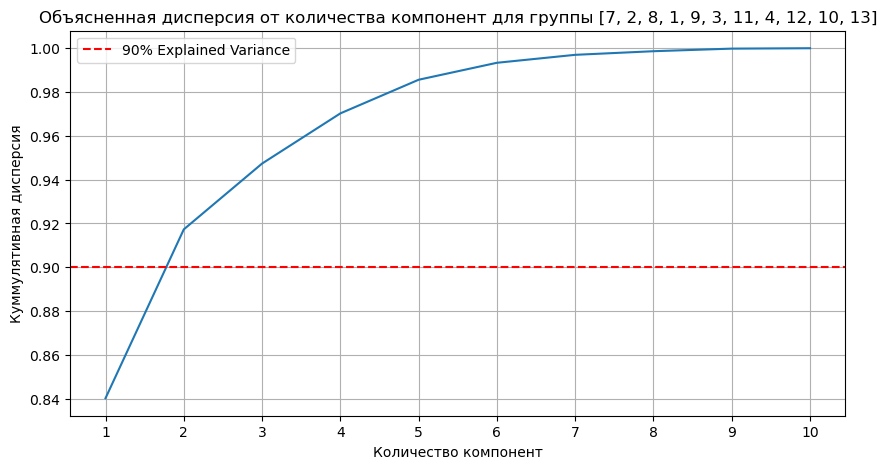

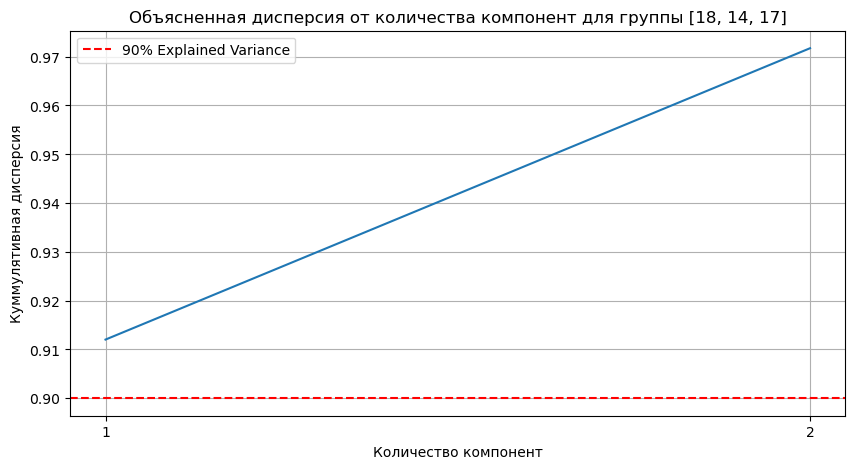

In [34]:
# Сразу подготовим данные для дальнейших манипуляций
# Выделим колонки, которые не пойдут под трансформацию
columns_wo_pca = [i for i in groups for i in i]

# создадим субсеты для трейн/теста которые не будем трогать
X_train_wo_pca = X_train_sc.drop(columns=columns_wo_pca)
X_test_wo_pca = X_test_sc.drop(columns=columns_wo_pca)

# Выделим группы с этапа хитмапа
pca_group_1 = groups[0]
pca_group_2 = groups[1]

# На их основе создадим субсеты для PCA
X_train_pca_1 = X_train_sc[pca_group_1]
X_train_pca_2 = X_train_sc[pca_group_2]

X_test_pca_1 = X_test_sc[pca_group_1]
X_test_pca_2 = X_test_sc[pca_group_2]

##############################################


def var_visualisation(pca_group, subset):
    var_plot_data = list()

    for i in range(1, len(pca_group)):
        pca = PCA(n_components=i, random_state=42)
        pca.fit(subset)
        # var_plot_data[i] = pca.explained_variance_ratio_
        var_plot_data.append(pca.explained_variance_ratio_)

    # Подготовка данных для графика
    num_components = list(range(1, len(var_plot_data) + 1)
                          )  # Количество компонент
    # Суммарная объясненная дисперсия
    explained_variance = [sum(var) for var in var_plot_data]

    # Построение графика
    fig, axes = plt.subplots(1, 1, figsize=(10, 5))
    sns.lineplot(x=num_components, y=explained_variance, ax=axes)
    plt.title(
        f'Объясненная дисперсия от количества компонент для группы {pca_group}')
    plt.xlabel('Количество компонент')
    plt.ylabel('Куммулятивная дисперсия')
    plt.xticks(num_components)  # Отображение всех значений по оси X
    plt.grid()
    plt.axhline(y=0.9, color='r', linestyle='--',
                label='90% Explained Variance')  # Отметка для 90%
    plt.legend()
    plt.show()

###############################################


var_visualisation(pca_group_1, X_train_pca_1)
var_visualisation(pca_group_2, X_train_pca_2)

In [35]:
print(X_train_pca_1.shape, X_train_pca_2.shape, X_train_wo_pca.shape)
print(X_test_pca_1.shape, X_test_pca_2.shape, X_test_wo_pca.shape)

(549, 11) (549, 3) (549, 4)
(297, 11) (297, 3) (297, 4)


> Для первой группы возьмем количество компонент равное 5, для второй группы равное 2.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [36]:
# YOUR CODE HERE
# Преобразуем по отдельности группы
comp_1 = 5
pca_agent_1 = PCA(n_components=comp_1, random_state=42)
X_train_pca_1 = pca_agent_1.fit_transform(X_train_pca_1)
X_train_pca_1 = pd.DataFrame(X_train_pca_1, columns=[
                             pca_group_1[:comp_1]])  # извращение
X_test_pca_1 = pca_agent_1.transform(X_test_pca_1)
X_test_pca_1 = pd.DataFrame(X_test_pca_1, columns=[pca_group_1[:comp_1]])

comp_2 = 2
pca_agent_2 = PCA(n_components=comp_2, random_state=42)
X_train_pca_2 = pca_agent_2.fit_transform(X_train_pca_2)
X_train_pca_2 = pd.DataFrame(X_train_pca_2, columns=[
                             pca_group_2[:comp_2]])  # извращение
X_test_pca_2 = pca_agent_2.transform(X_test_pca_2)
X_test_pca_2 = pd.DataFrame(X_test_pca_2, columns=[pca_group_2[:comp_2]])

In [37]:
X_train_pca = pd.concat([X_train_wo_pca, X_train_pca_1, X_train_pca_2], axis=1)
X_test_pca = pd.concat([X_test_wo_pca, X_test_pca_1, X_test_pca_2], axis=1)

display(X_train_pca.head(), X_test_pca.head())

5         6        15        16      (7,)      (2,)      (8,)  \
0  0.559465  0.362406 -0.156216 -0.166534 -1.420916 -0.641069  0.847255   
1  1.535419  1.286251  0.902288  0.271813  5.038435  0.417635  0.232944   
2  0.705057 -0.423334 -0.156216 -2.785737 -1.582731 -0.117312  0.138098   
3 -0.526012 -2.078325 -2.102142  0.785328  4.797270 -0.351852  0.002832   
4  1.266467 -0.423334  0.681848  0.785328  0.643823  0.189079  0.142752   

       (1,)      (9,)     (18,)     (14,)  
0  0.471949  0.620313  2.455206  0.238986  
1  0.215150  0.043283 -0.338598 -0.273297  
2  0.449521 -0.538401  2.355005  0.796034  
3 -0.979949 -0.858754 -1.749392  0.681364  
4  0.713165 -0.646014  2.018121  0.927177

5         6        15        16      (7,)      (2,)      (8,)  \
0  1.667143 -0.893529  0.412052 -2.785737 -1.261057  1.018617 -1.077089   
1 -1.564323 -0.008593  0.902288 -0.166534 -3.171996  0.003733  1.169747   
2 -1.031255 -0.423334 -2.102142  0.519329 -1.806096  0.831697  0.011271   
3  0.109076 -0.893529  1.392524  0.360153 -1.603256  0.251152 -0.039781   
4 -0.859894 -0.423334 -0.426013  0.442396 -1.381845  1.758968 -0.961290   

       (1,)      (9,)     (18,)     (14,)  
0  0.850267 -0.285889 -1.344640 -0.370520  
1 -0.471234  0.031182 -1.979662 -0.096436  
2 -0.725530 -0.596368 -2.503941 -0.153142  
3  0.264362  0.255281 -1.075517 -0.286689  
4 -0.144156  0.118433 -2.338192 -0.103641

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

F1 на тесте: 0.6941
Accuracy на тесте: 0.7071
ROC-score на тесте: 0.9174


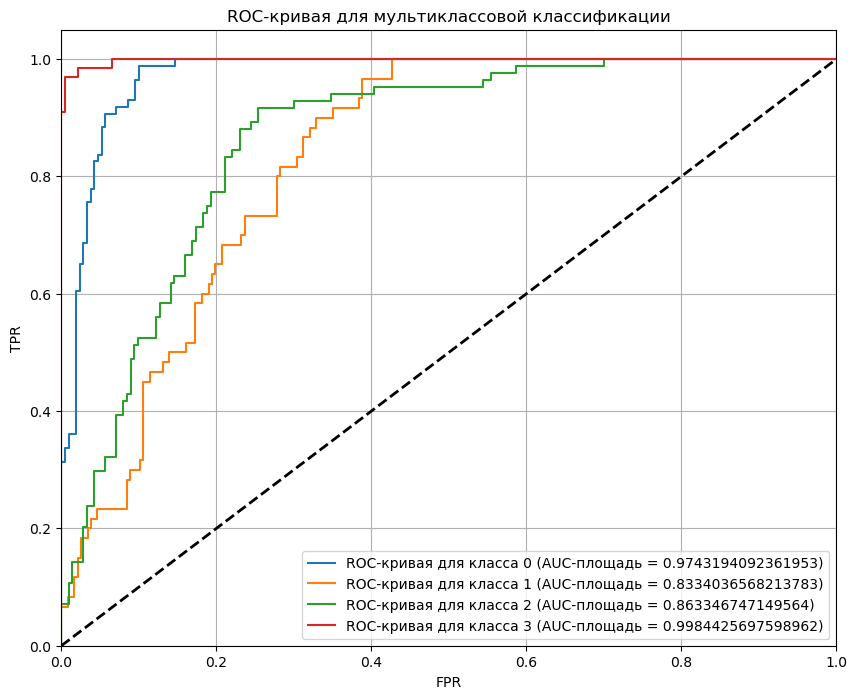

In [38]:
# YOUR CODE HERE

estimator = LogisticRegression(
    # multi_class="multinomial", # уберу для тушения ворнингов
    solver="saga",
    tol=1e-3,
    max_iter=500,
    n_jobs=-1
)

param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': [
        'elasticnet'], 'l1_ratio': [0, 0.5, 1]},
]

# Пройдемся по сетке со скорингом из двух метрик
pca_log_reg = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    return_train_score=True,
    scoring=f1,
    refit=True,
    n_jobs=-1
)

pca_log_reg.fit(X_train_pca, y_train)

# Предсказания на тестовых данных
y_pred = pca_log_reg.predict(X_test_pca)
y_pred_proba = pca_log_reg.predict_proba(X_test_pca)

# Расчитаем метрики на пожобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)

> Стало хуже, следовательно в дальнейших изысканиях буду использовать скалированное но не сжатое пространство признаков.

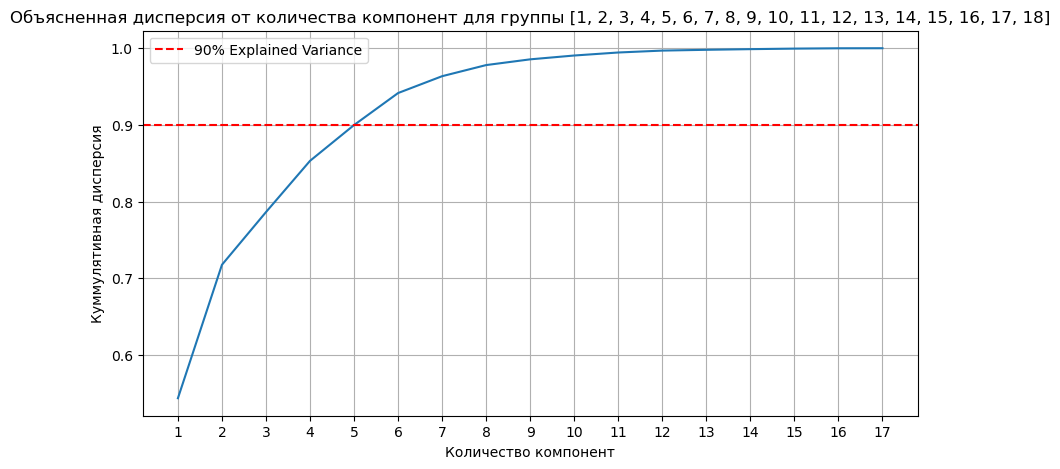

In [39]:
# Попробуем накинуть PCA на весь датасет

pca_group_whole = X_train_sc.columns.to_list()

var_visualisation(pca_group_whole, X_train_sc)

> Возьмем 16 компонент

In [40]:
pca = PCA(n_components=16)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

F1 на тесте: 0.8059
Accuracy на тесте: 0.8114
ROC-score на тесте: 0.9566


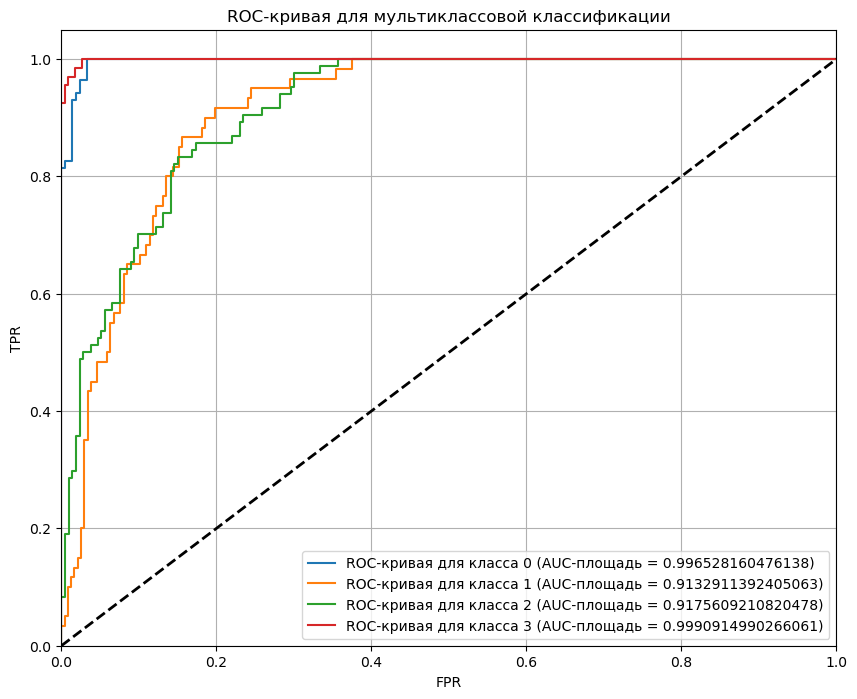

In [41]:
# YOUR CODE HERE
estimator = LogisticRegression(
    # multi_class="multinomial", # уберу для тушения ворнингов
    solver="saga",
    tol=1e-3,
    max_iter=1000,
    n_jobs=-1
)

param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': [
        'elasticnet'], 'l1_ratio': [0, 0.5, 1]},
]

# Пройдемся по сетке со скорингом из двух метрик
pca_log_reg = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    return_train_score=True,
    scoring=f1,
    refit=True,
    n_jobs=-1
)

pca_log_reg.fit(X_train_pca, y_train)

# Предсказания на тестовых данных
y_pred = pca_log_reg.predict(X_test_pca)
y_pred_proba = pca_log_reg.predict_proba(X_test_pca)

# Расчитаем метрики на пожобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)

> Накинув PCA на весь датасет и увеличив количество иттераций мы получили лучший результат на данный момент.

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

F1 на тесте: 0.6857
Accuracy на тесте: 0.6902
ROC-score на тесте: 0.7976


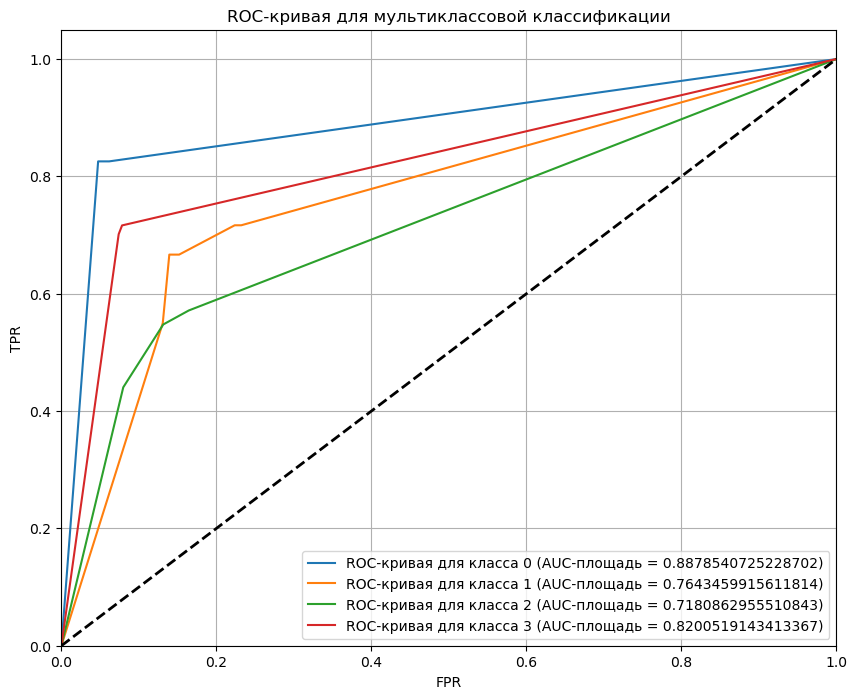

In [42]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
# YOUR CODE HERE
# Скопируем старый код
# Используем скорер-мейкеры для использования в
# грид-серче, используем взвешенный расчет
f1 = make_scorer(f1_score, average='macro')
accuracy = make_scorer(accuracy_score, sample_weigh='weighted')

estimator = DecisionTreeClassifier(
    random_state=42
)

# Определяем параметры для поиска
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

# Пройдемся по сетке со скорингом из двух метрик
scaled_tree = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    return_train_score=True,
    scoring=f1,
    refit=True,
    n_jobs=-1
)

scaled_tree.fit(X_train_pca, y_train)

# Предсказания на тестовых данных
y_pred = scaled_tree.predict(X_test_pca)
y_pred_proba = scaled_tree.predict_proba(X_test_pca)

# Расчитаем метрики на пожобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)

> Результат хуже чем PCA на датасете под логрегом.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

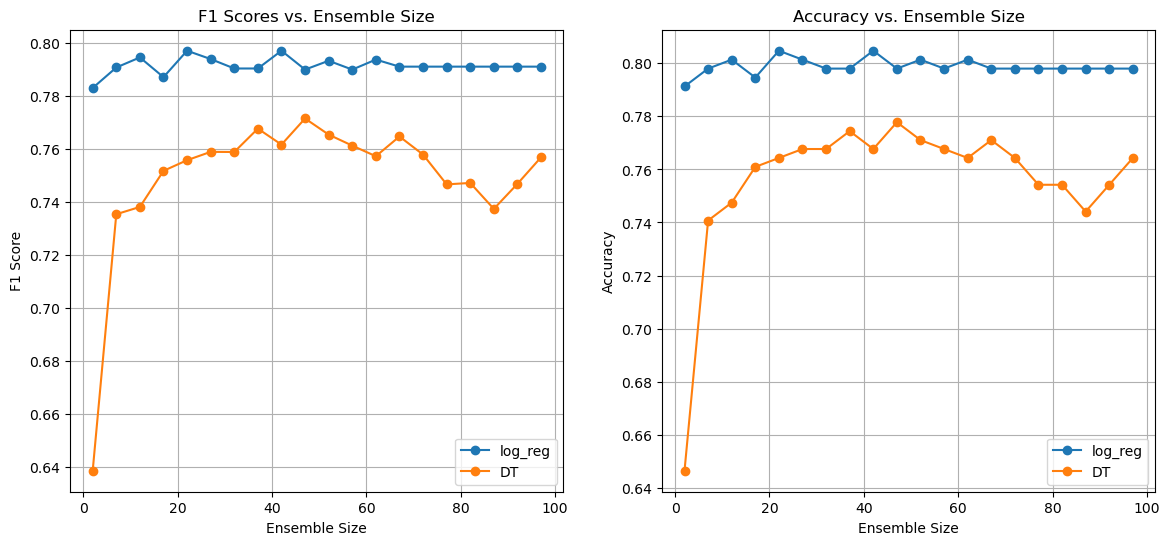

In [45]:
# YOUR CODE HERE
N_min = 2
N_max = 100
step = 5
ensemble_sizes = list(range(N_min, N_max + 1, step))
f1_scores_logreg = []
f1_scores_tree = []
accuracy_scores_logreg = []
accuracy_scores_tree = []

for N in ensemble_sizes:
    # Bagging для логистической регрессии
    logreg_bagging = BaggingClassifier(estimator=LogisticRegression(),
                                       n_estimators=N,
                                       random_state=42)
    logreg_bagging.fit(X_train_pca, y_train)
    y_pred_logreg = logreg_bagging.predict(X_test_pca)
    # Используем f1_score напрямую
    f1_scores_logreg.append(f1_score(y_test, y_pred_logreg, average='macro'))
    # Используем accuracy_score напрямую
    accuracy_scores_logreg.append(accuracy_score(y_test, y_pred_logreg))

    # Bagging для деревьев решений
    tree_bagging = BaggingClassifier(estimator=DecisionTreeClassifier(),
                                     n_estimators=N,
                                     random_state=42)
    tree_bagging.fit(X_train_pca, y_train)
    y_pred_tree = tree_bagging.predict(X_test_pca)
    # Используем f1_score напрямую
    f1_scores_tree.append(f1_score(y_test, y_pred_tree, average='macro'))
    # Используем accuracy_score напрямую
    accuracy_scores_tree.append(accuracy_score(y_test, y_pred_tree))

# Построение графиков остается без изменений
plt.figure(figsize=(14, 6))

# График F1-меры
plt.subplot(1, 2, 1)
plt.plot(ensemble_sizes, f1_scores_logreg,
         label='log_reg', marker='o')
plt.plot(ensemble_sizes, f1_scores_tree, label='DT', marker='o')
plt.title('F1 Scores vs. Ensemble Size')
plt.xlabel('Ensemble Size')
plt.ylabel('F1 Score')
plt.legend()
plt.grid()

# График точности
plt.subplot(1, 2, 2)
plt.plot(ensemble_sizes, accuracy_scores_logreg,
         label='log_reg', marker='o')
plt.plot(ensemble_sizes, accuracy_scores_tree,
         label='DT', marker='o')
plt.title('Accuracy vs. Ensemble Size')
plt.xlabel('Ensemble Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

> Лучший результат логрег на ансамбле в 41-43 моделей.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

F1 на тесте: 0.7594
Accuracy на тесте: 0.771
ROC-score на тесте: 0.952


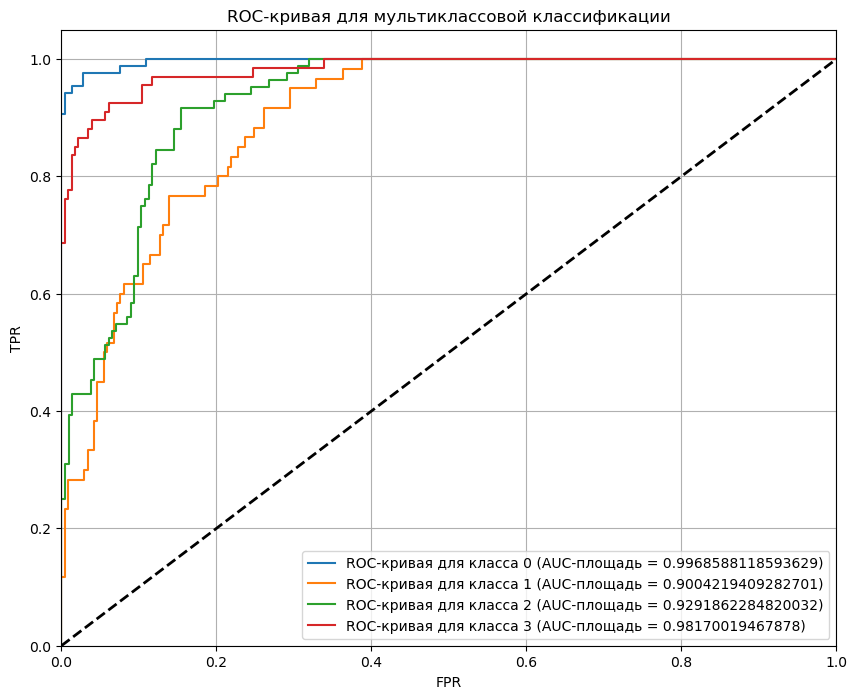

In [46]:
# YOUR CODE HERE
# Скопируем старый код
# Используем скорер-мейкеры для использования в
# грид-серче, используем взвешенный расчет
f1 = make_scorer(f1_score, average='macro')
accuracy = make_scorer(accuracy_score)

estimator = RandomForestClassifier(
    random_state=42
)

# Определяем параметры для поиска
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Создание скореров для нескольких метрик
scoring = {
    'f1': f1,
    'accuracy': accuracy
}

# Настройка RandomizedSearchCV
scaled_forest = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=param_grid,
    return_train_score=True,
    scoring=scoring,
    refit='f1',
    n_jobs=-1,
)

scaled_forest.fit(X_train_pca, y_train)

# Предсказания на тестовых данных
y_pred = scaled_forest.predict(X_test_pca)
y_pred_proba = scaled_forest.predict_proba(X_test_pca)

# Расчитаем метрики на пожобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)

> Метрики уступают log_reg на X_whole_pca

---

### Создадим пайплайны лучших моделей

In [47]:
# Опять разведем таргет и фиты для логарифмирования
X = data.drop(columns=['target'])
y = data['target']

# Разбиваем на тренинговый и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=42)

In [ ]:
n_components = 16
# Создаем Pipeline log-rega
log_reg_pipe = Pipeline([
    ('log_transformer', LogTransformer()),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('log_reg_pca', pca_log_reg)
])

# Pipe для дерева
dt_pipe = Pipeline([
    ('log_transformer', LogTransformer()),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('best_tree', scaled_tree)
])

# Pipe для беггинга
bag_pipe = Pipeline([
    ('log_transformer', LogTransformer()),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('bag', BaggingClassifier(
        estimator=LogisticRegression(),
        n_estimators=43,
        random_state=42))
])

# Pipe для леса
forest_pipe = Pipeline([
    ('log_transformer', LogTransformer()),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('rfc', scaled_forest)
])

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

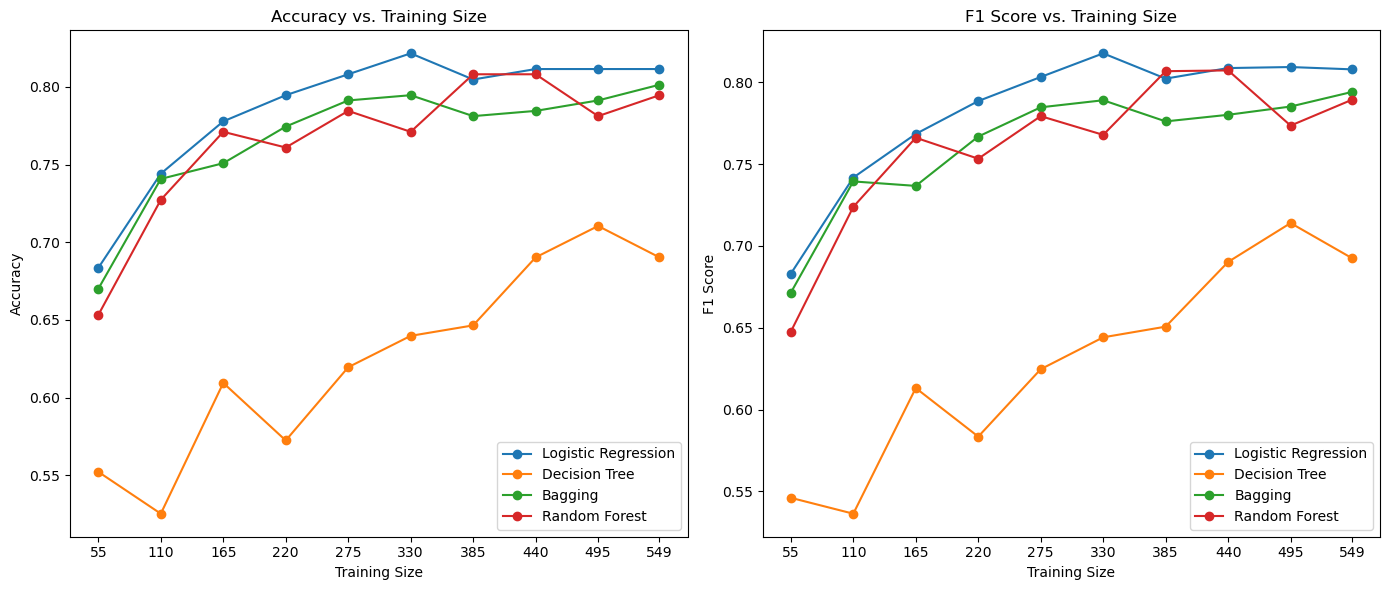

In [49]:
# YOUR CODE HERE
# Разделяем X_train и y_train на 10 частей
X_train_split = np.array_split(X_train, 10)
y_train_split = np.array_split(y_train, 10)

# Модели
models = {
    'Logistic Regression': log_reg_pipe,
    'Decision Tree': dt_pipe,
    'Bagging': bag_pipe,
    'Random Forest': forest_pipe
}

# Хранение метрик
results = {key: {'accuracy': [], 'f1': []} for key in models.keys()}

# Обучение моделей и расчет метрик с увеличением размера тренировочного набора
for i in range(1, 11):  # от 1 до 10
    X_train_subset = pd.concat(X_train_split[:i])
    y_train_subset = pd.concat(y_train_split[:i])

    for model_name, model in models.items():
        model.fit(X_train_subset, y_train_subset)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        results[model_name]['accuracy'].append(accuracy)
        results[model_name]['f1'].append(f1)

# Построение графиков
train_sizes = [len(pd.concat(X_train_split[:i])) for i in range(1, 11)]

plt.figure(figsize=(14, 6))

# График для Accuracy
plt.subplot(1, 2, 1)
for model_name, metrics in results.items():
    plt.plot(train_sizes, metrics['accuracy'], marker='o', label=model_name)
plt.title('Accuracy vs. Training Size')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.xticks(train_sizes)
plt.legend()

# График для F1 Score
plt.subplot(1, 2, 2)
for model_name, metrics in results.items():
    plt.plot(train_sizes, metrics['f1'], marker='o', label=model_name)
plt.title('F1 Score vs. Training Size')
plt.xlabel('Training Size')
plt.ylabel('F1 Score')
plt.xticks(train_sizes)
plt.legend()

plt.tight_layout()
plt.show()

> По данным графиков, можно отметить, что в данном случае качество предсказаний начинает падать на определенном моменте увеличения тренировочной выборки (в случае с логистической регрессией и случайным лесом, но не деревом-оно ведет себя предсказуемо), что может сказать о наличии и влиянии выбросов к которым не чувствительно дерево.

---

### Бонус, проверка отсутсвия утечек на этапе экспериментов плюс попытка понять причины низкой метрики.

In [52]:
# Функция для отсечения выбросов
def outliers_z_score(data, feature, left_mod=3, right_mod=3, log_scale=False):

    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]

    mu = x.mean()

    sigma = x.std()

    lower_bound = mu - left_mod * sigma

    upper_bound = mu + right_mod * sigma

    outliers = data[(x < lower_bound) | (x > upper_bound)]

    cleaned = data[(x > lower_bound) & (x < upper_bound)]

    return  cleaned

### Реинициализируем датасет

In [75]:
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

# Преобразуем датасет к датафрейму
data_df = pd.DataFrame(data)
target_df = pd.DataFrame(target)

data_df = data_df.drop(columns=0)

# Закодируем таргет
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target_df)
y_target = pd.DataFrame(y, columns=["target"])

(846, 19) (846,)


In [76]:
# Склеим датасет для очистки выбросов
data = pd.concat([data_df, y_target], axis=1)
data.head()

1   2    3    4    5   6    7   8   9   10   11   12   13   14  15  16  \
0   95  48   83  178   72  10  162  42  20  159  176  379  184   70   6  16   
1   91  41   84  141   57   9  149  45  19  143  170  330  158   72   9  14   
2  104  50  106  209   66  10  207  32  23  158  223  635  220   73  14   9   
3   93  41   82  159   63   9  144  46  19  143  160  309  127   63   6  10   
4   85  44   70  205  103  52  149  45  19  144  241  325  188  127   9  11   

    17   18  target  
0  187  197       3  
1  189  199       3  
2  188  196       2  
3  199  207       3  
4  180  183       0

### Очистим от выбросов 3-мя сигмами

In [77]:
data = outliers_z_score(data, feature=3)
data = outliers_z_score(data, feature=4)
data = outliers_z_score(data, feature=5)
data = outliers_z_score(data, feature=6)
data = outliers_z_score(data, feature=14)
data = outliers_z_score(data, feature=15)
data = outliers_z_score(data, feature=16)

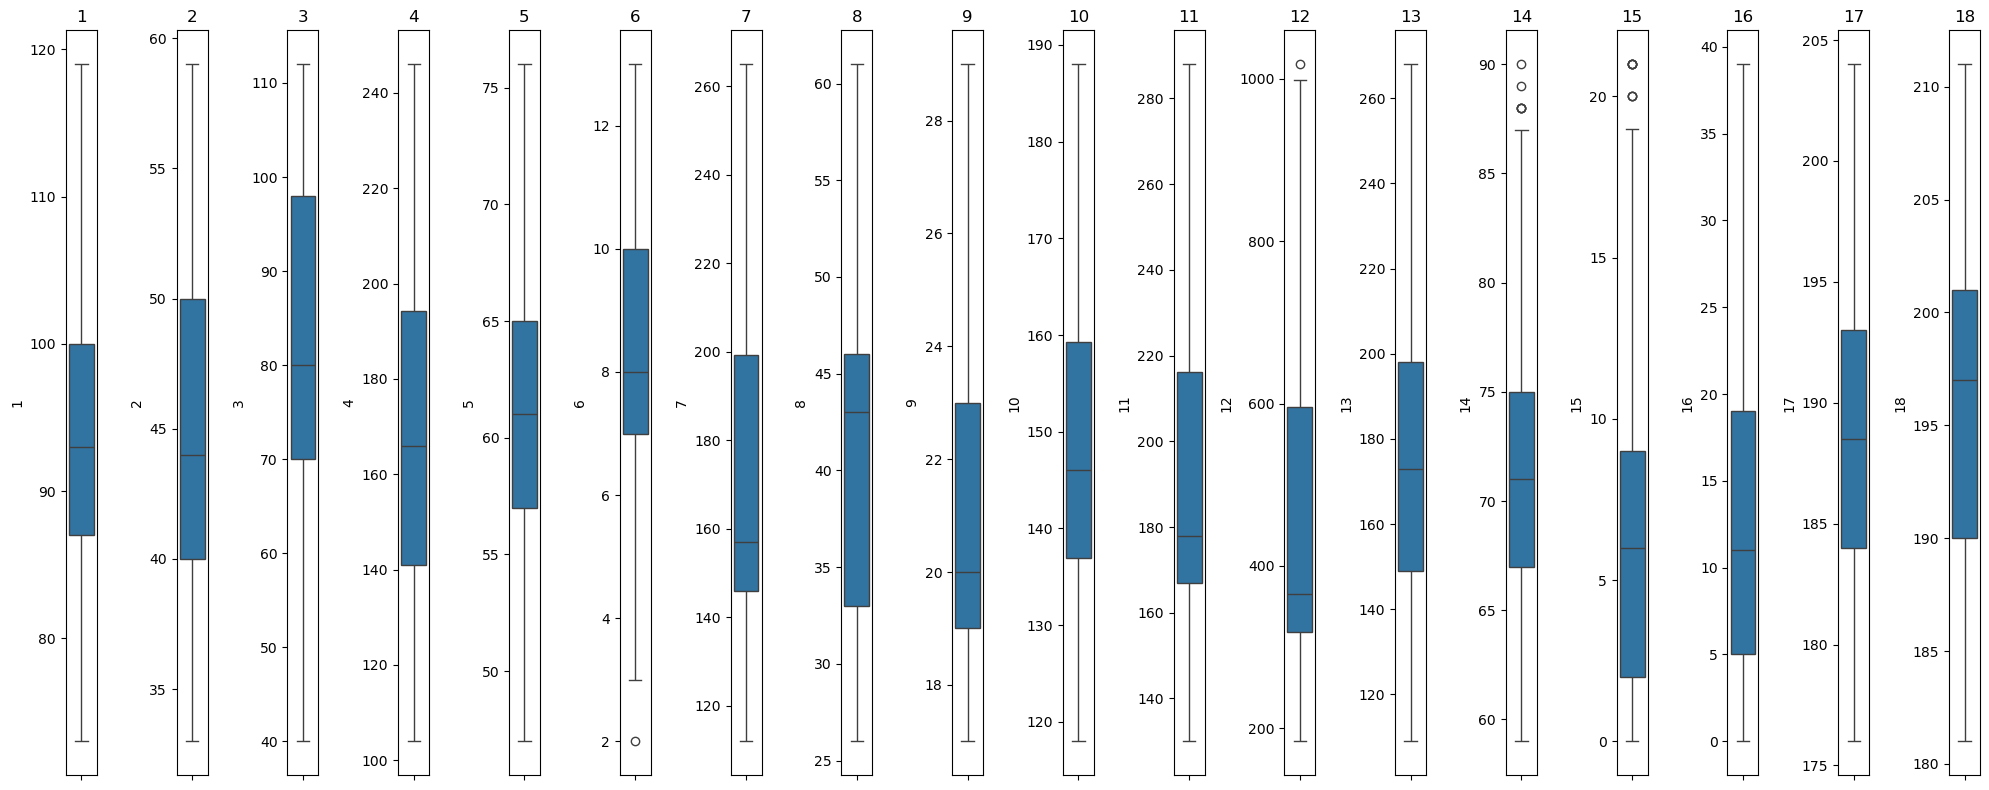

In [78]:
# Создание подграфиков
fig, axes = plt.subplots(1, num_columns, figsize=(20, 8))

# Обход всех колонок и построение боксплота для каждой из них
for i, column in enumerate(data.columns[:-1]):
    sns.boxplot(data=data[column], ax=axes[i])
    axes[i].set_title(column)

# Отображение графиков
plt.tight_layout()
plt.show()

In [83]:
# Опять разведем таргет и фиты для логарифмирования
X = data.drop(columns=['target'])
y = data['target']

# Разбиваем на тренинговый и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.45, random_state=42)

In [ ]:
# Пересоздадим пайплайны и для устойчивости укажем лучшие имплементации моделей
n_components = 16
# Создаем Pipeline log-rega
log_reg_pipe = Pipeline([
    ('log_transformer', LogTransformer()),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('log_reg_pca', LogisticRegression(
        C=100, penalty='l2',
        max_iter=1000, n_jobs=-1, 
        solver='saga', tol=0.001, 
        random_state=42
        ))
])

# Pipe для дерева
dt_pipe = Pipeline([
    ('log_transformer', LogTransformer()),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('best_tree', DecisionTreeClassifier(
        class_weight= 'balanced',
        criterion= 'gini',
        max_depth= None,
        max_features= None,
        min_samples_leaf= 1,
        min_samples_split= 2,
        random_state=42))
])

# Pipe для беггинга
bag_pipe = Pipeline([
    ('log_transformer', LogTransformer()),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('bag', BaggingClassifier(
        estimator=LogisticRegression(),
        n_estimators=43,
        random_state=42))
])

# Pipe для леса
forest_pipe = Pipeline([
    ('log_transformer', LogTransformer()),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('rfc', RandomForestClassifier(
        criterion='entropy', max_depth=15, 
        min_samples_leaf=2, n_estimators=200, 
        random_state=42))
])

F1 на тесте: 0.8183
Accuracy на тесте: 0.8177
ROC-score на тесте: 0.955


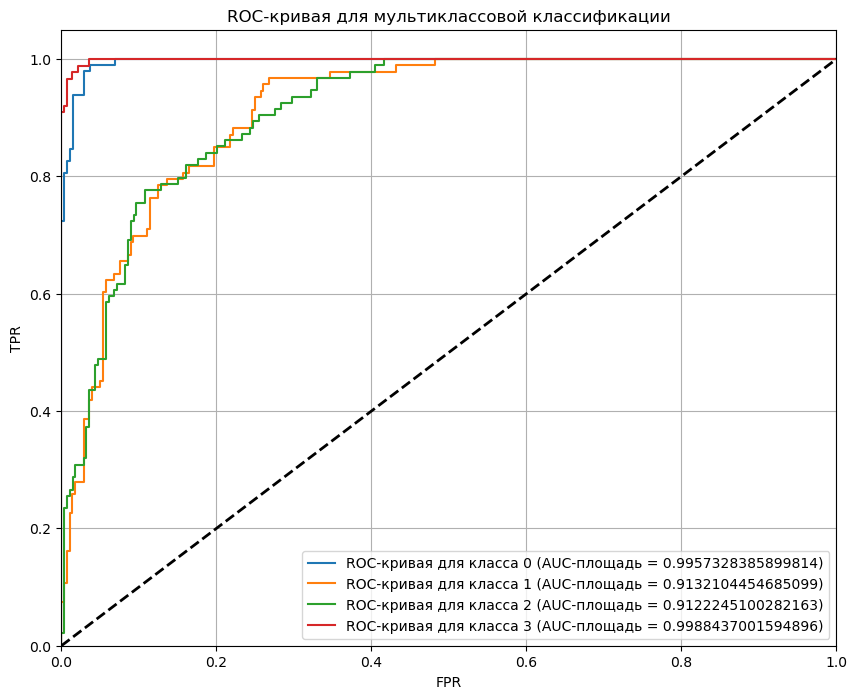

In [84]:
# Посмотрим как отработают наши пайпы
# log-reg с PCA
log_reg_pipe.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = log_reg_pipe.predict(X_test)
y_pred_proba = log_reg_pipe.predict_proba(X_test)

# Расчитаем метрики на пожобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)

F1 на тесте: 0.6709
Accuracy на тесте: 0.6729
ROC-score на тесте: 0.7817


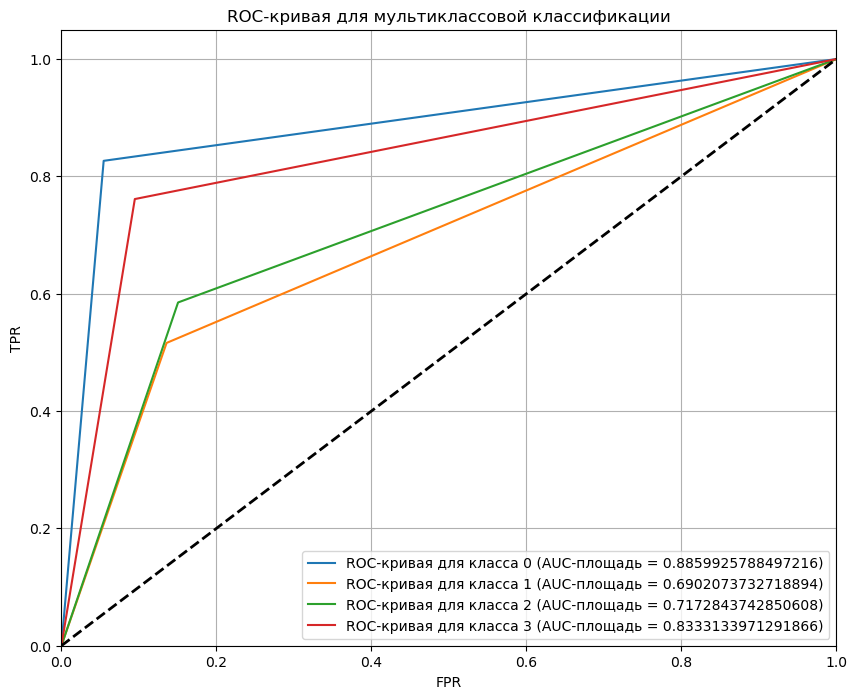

In [85]:
# дерево
dt_pipe.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = dt_pipe.predict(X_test)
y_pred_proba = dt_pipe.predict_proba(X_test)

# Расчитаем метрики на пожобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)

F1 на тесте: 0.8071
Accuracy на тесте: 0.807
ROC-score на тесте: 0.9495


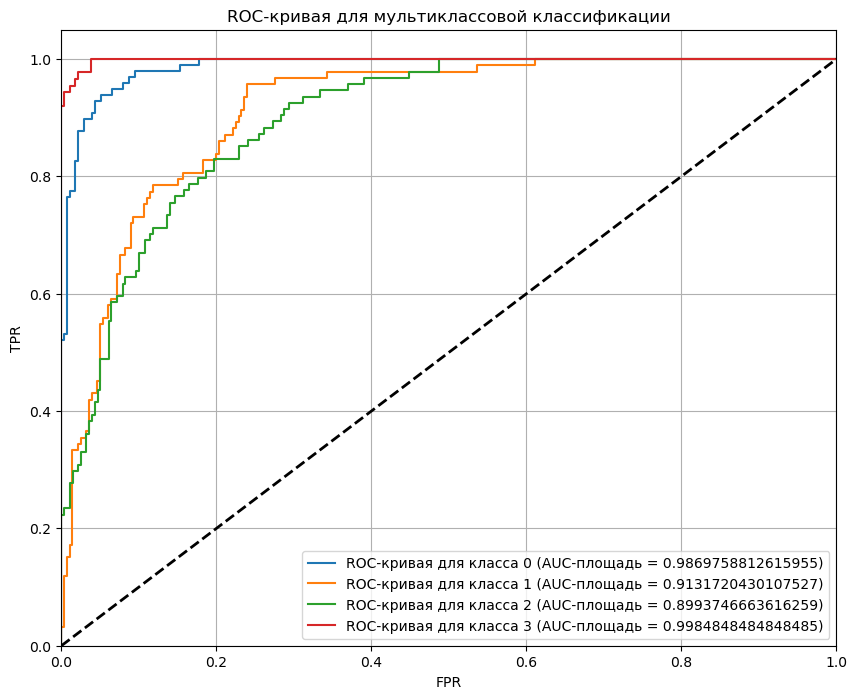

In [86]:
# бэггинг
bag_pipe.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = bag_pipe.predict(X_test)
y_pred_proba = bag_pipe.predict_proba(X_test)

# Расчитаем метрики на пожобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)

F1 на тесте: 0.815
Accuracy на тесте: 0.8177
ROC-score на тесте: 0.9514


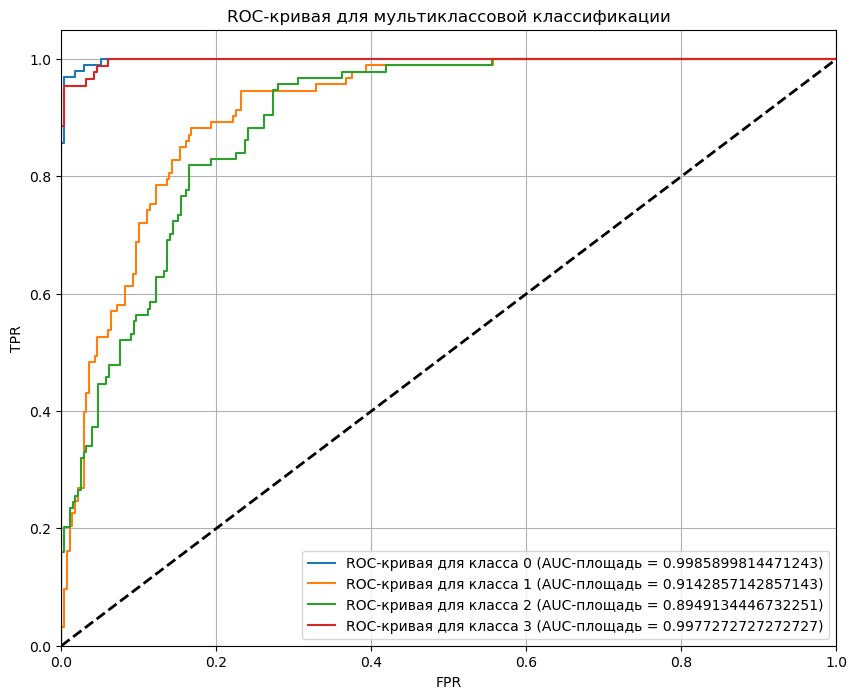

F1 на тесте: 1.0
Accuracy на тесте: 1.0
ROC-score на тесте: 1.0


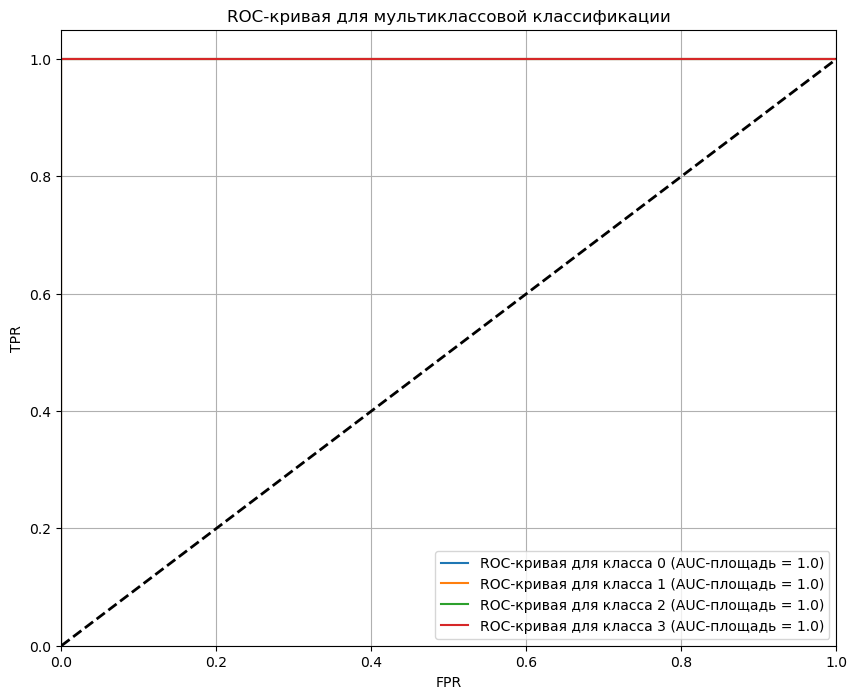

In [90]:
# лес
forest_pipe.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = forest_pipe.predict(X_test)
y_pred_proba = forest_pipe.predict_proba(X_test)

y_pred_train = forest_pipe.predict(X_train)
y_pred_proba_train = forest_pipe.predict_proba(X_train)

# Расчитаем метрики на пожобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)
metrics_estimation(y_train, y_pred_train, y_pred_proba_train)

> Пайплайн работает как надо, утечек нет, но есть нюанс!

> Модель переобучилась, и это ответ на то, почему на последнем задании с увеличением тренировочной выборки метрика с определенного момента начала падать. Скорее всего причина кроется в недостаточной подготовке данных. Попробуем это исправить.

----
### Делаем все по уму

In [204]:
from collections import defaultdict
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

---
---
### Технический блок

In [2]:
# Функция для отсечения выбросов
def outliers_z_score(data, feature, left_mod=3, right_mod=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]

    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left_mod * sigma
    upper_bound = mu + right_mod * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]

    return cleaned

In [3]:
# Класс логтрасформера 
class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transf = X.copy()
        # прикольный метод завместо np.log(x+1)
        X_transf = np.log1p(X_transf)
        return X_transf

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

In [4]:
# Вычисление мультиколлинеарности пар (по заданному порогу)
def multicor_finder(data, threshold=0.8):
    high_corr_pairs = []
    for i in range(len(data.corr().columns)):
        for j in range(i):
            if abs(data.corr().iloc[i, j]) > threshold:
                high_corr_pairs.append((data.corr().columns[i], data.corr(
                ).columns[j], data.corr().iloc[i, j]))

    # Функция для поиска связных компонент (групп)
    def find_connected_components(pairs):
        graph = defaultdict(list)
        # Строим граф
        for x, y, _ in pairs:
            graph[x].append(y)
            graph[y].append(x)

        visited = set()
        groups = []

        # Поиск в глубину (DFS) для нахождения связных компонент
        def dfs(node, component):
            if node not in visited:
                visited.add(node)
                component.append(node)
                for neighbor in graph[node]:
                    dfs(neighbor, component)

        for node in graph:
            if node not in visited:
                component = []
                dfs(node, component)
                groups.append(component)

        return groups

    # Формирование групп
    groups = find_connected_components(high_corr_pairs)

    # Вывод результатов
    print("Сформированные группы:", groups)

    return groups

In [5]:
# Создадим функцию для расчета метрик
def metrics_estimation(
    y_true, y_pred, y_pred_proba, label="test", 
    average='macro', multi_class='ovr', round_tresh=4):
    # Расчет f1_score, accuracy_score, roc_auc_score на тесте
    f1_test = np.round(f1_score(y_true, y_pred, average=average), round_tresh)
    accuracy_test = np.round(accuracy_score(y_true, y_pred), round_tresh)
    rocauc_sc = np.round(roc_auc_score(
        y_true, y_pred_proba, multi_class=multi_class), round_tresh)

    print(f"F1 на {label}: {f1_test}")
    print(f"Accuracy на {label}: {accuracy_test}")
    print(f"ROC-score на {label}: {rocauc_sc}")

    # Построение ROC-AUC кривой для каждого класса
    n_classes = np.unique(y_true).size  # Получаем количество классов
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Цикл по каждому классу
    for i in range(n_classes):
        # Изменен индекс для бинаризации
        fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Построение ROC кривых
    plt.figure(figsize=(10, 8))

    for i in range(n_classes):
        plt.plot(
            fpr[i], tpr[i],
            label=f'ROC-кривая для класса {i} (AUC-площадь = {roc_auc[i]})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(
        'ROC-кривая для мультиклассовой классификации')
    plt.legend()
    plt.grid()
    plt.show()

In [130]:
def var_visualisation(pca_group, subset):
    var_plot_data = list()

    for i in range(1, len(pca_group)):
        pca = PCA(n_components=i, random_state=42)
        pca.fit(subset)
        # var_plot_data[i] = pca.explained_variance_ratio_
        var_plot_data.append(pca.explained_variance_ratio_)

    # Подготовка данных для графика
    num_components = list(range(1, len(var_plot_data) + 1))  # Количество компонент
    # Суммарная объясненная дисперсия
    explained_variance = [sum(var) for var in var_plot_data]

    # Построение графика
    fig, axes = plt.subplots(1, 1, figsize=(10, 5))
    sns.lineplot(x=num_components, y=explained_variance, ax=axes)
    plt.title(
        f'Объясненная дисперсия от количества компонент для группы {pca_group}')
    plt.xlabel('Количество компонент')
    plt.ylabel('Куммулятивная дисперсия')
    plt.xticks(num_components)  # Отображение всех значений по оси X
    plt.grid()
    plt.axhline(y=0.9, color='r', linestyle='--',
                label='90% Explained Variance')  # Отметка для 90%
    plt.legend()
    plt.show()

----
### Инициализация датасета

In [69]:
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

# Преобразуем датасет к датафрейму
data_df = pd.DataFrame(data)
target_df = pd.DataFrame(target)

data_df = data_df.drop(columns=0) # колонка индекс

# Закодируем таргет
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target_df)
y_target = pd.DataFrame(y, columns=["target"])

# Склеим датасет для очистки выбросов
data = pd.concat([data_df, y_target], axis=1)
data.head()

(846, 19) (846,)


1   2    3    4    5   6    7   8   9   10   11   12   13   14  15  16  \
0   95  48   83  178   72  10  162  42  20  159  176  379  184   70   6  16   
1   91  41   84  141   57   9  149  45  19  143  170  330  158   72   9  14   
2  104  50  106  209   66  10  207  32  23  158  223  635  220   73  14   9   
3   93  41   82  159   63   9  144  46  19  143  160  309  127   63   6  10   
4   85  44   70  205  103  52  149  45  19  144  241  325  188  127   9  11   

    17   18  target  
0  187  197       3  
1  189  199       3  
2  188  196       2  
3  199  207       3  
4  180  183       0

In [233]:
data_df.describe()

1           2           3           4           5           6   \
count  846.000000  846.000000  846.000000  846.000000  846.000000  846.000000   
mean    93.678487   44.861702   82.088652  168.940898   61.693853    8.567376   
std      8.234474    6.169866   15.771533   33.472183    7.888251    4.601217   
min     73.000000   33.000000   40.000000  104.000000   47.000000    2.000000   
25%     87.000000   40.000000   70.000000  141.000000   57.000000    7.000000   
50%     93.000000   44.000000   80.000000  167.000000   61.000000    8.000000   
75%    100.000000   49.000000   98.000000  195.000000   65.000000   10.000000   
max    119.000000   59.000000  112.000000  333.000000  138.000000   55.000000   

               7           8           9           10          11  \
count  846.000000  846.000000  846.000000  846.000000  846.000000   
mean   168.839243   40.933806   20.582742  147.998818  188.625296   
std     33.244978    7.811560    2.592138   14.515652   31.394837   
min    112.000000   26.000000   17.000000  118.000000  130.000000   
25%    146.250000   33.000000   19.000000  137.000000  167.000000   
50%    157.000000   43.000000   20.000000  146.000000  178.500000   
75%    198.000000   46.000000   23.000000  159.000000  217.000000   
max    265.000000   61.000000   29.000000  188.000000  320.000000   

                12         13          14          15          16          17  \
count   846.000000  846.00000  846.000000  846.000000  846.000000  846.000000   
mean    439.911348  174.70331   72.462175    6.377069   12.599291  188.932624   
std     176.692614   32.54649    7.486974    4.918353    8.931240    6.163949   
min     184.000000  109.00000   59.000000    0.000000    0.000000  176.000000   
25%     318.250000  149.00000   67.000000    2.000000    5.000000  184.000000   
50%     364.000000  173.00000   71.500000    6.000000   11.000000  188.000000   
75%     587.000000  198.00000   75.000000    9.000000   19.000000  193.000000   
max    1018.000000  268.00000  135.000000   22.000000   41.000000  206.000000   

               18  
count  846.000000  
mean   195.632388  
std      7.438797  
min    181.000000  
25%    190.250000  
50%    197.000000  
75%    201.000000  
max    211.000000

In [71]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       846 non-null    int64
 1   2       846 non-null    int64
 2   3       846 non-null    int64
 3   4       846 non-null    int64
 4   5       846 non-null    int64
 5   6       846 non-null    int64
 6   7       846 non-null    int64
 7   8       846 non-null    int64
 8   9       846 non-null    int64
 9   10      846 non-null    int64
 10  11      846 non-null    int64
 11  12      846 non-null    int64
 12  13      846 non-null    int64
 13  14      846 non-null    int64
 14  15      846 non-null    int64
 15  16      846 non-null    int64
 16  17      846 non-null    int64
 17  18      846 non-null    int64
dtypes: int64(18)
memory usage: 119.1 KB


> Все данные имеют числовой формат и судя по-всему 0 фит это индекс, дропнем его.

In [72]:
# Проверим наличие пропусков в данных
data_df.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

> Пропусков нет

In [73]:
data_df.duplicated().sum()

np.int64(0)

> Дублей нет

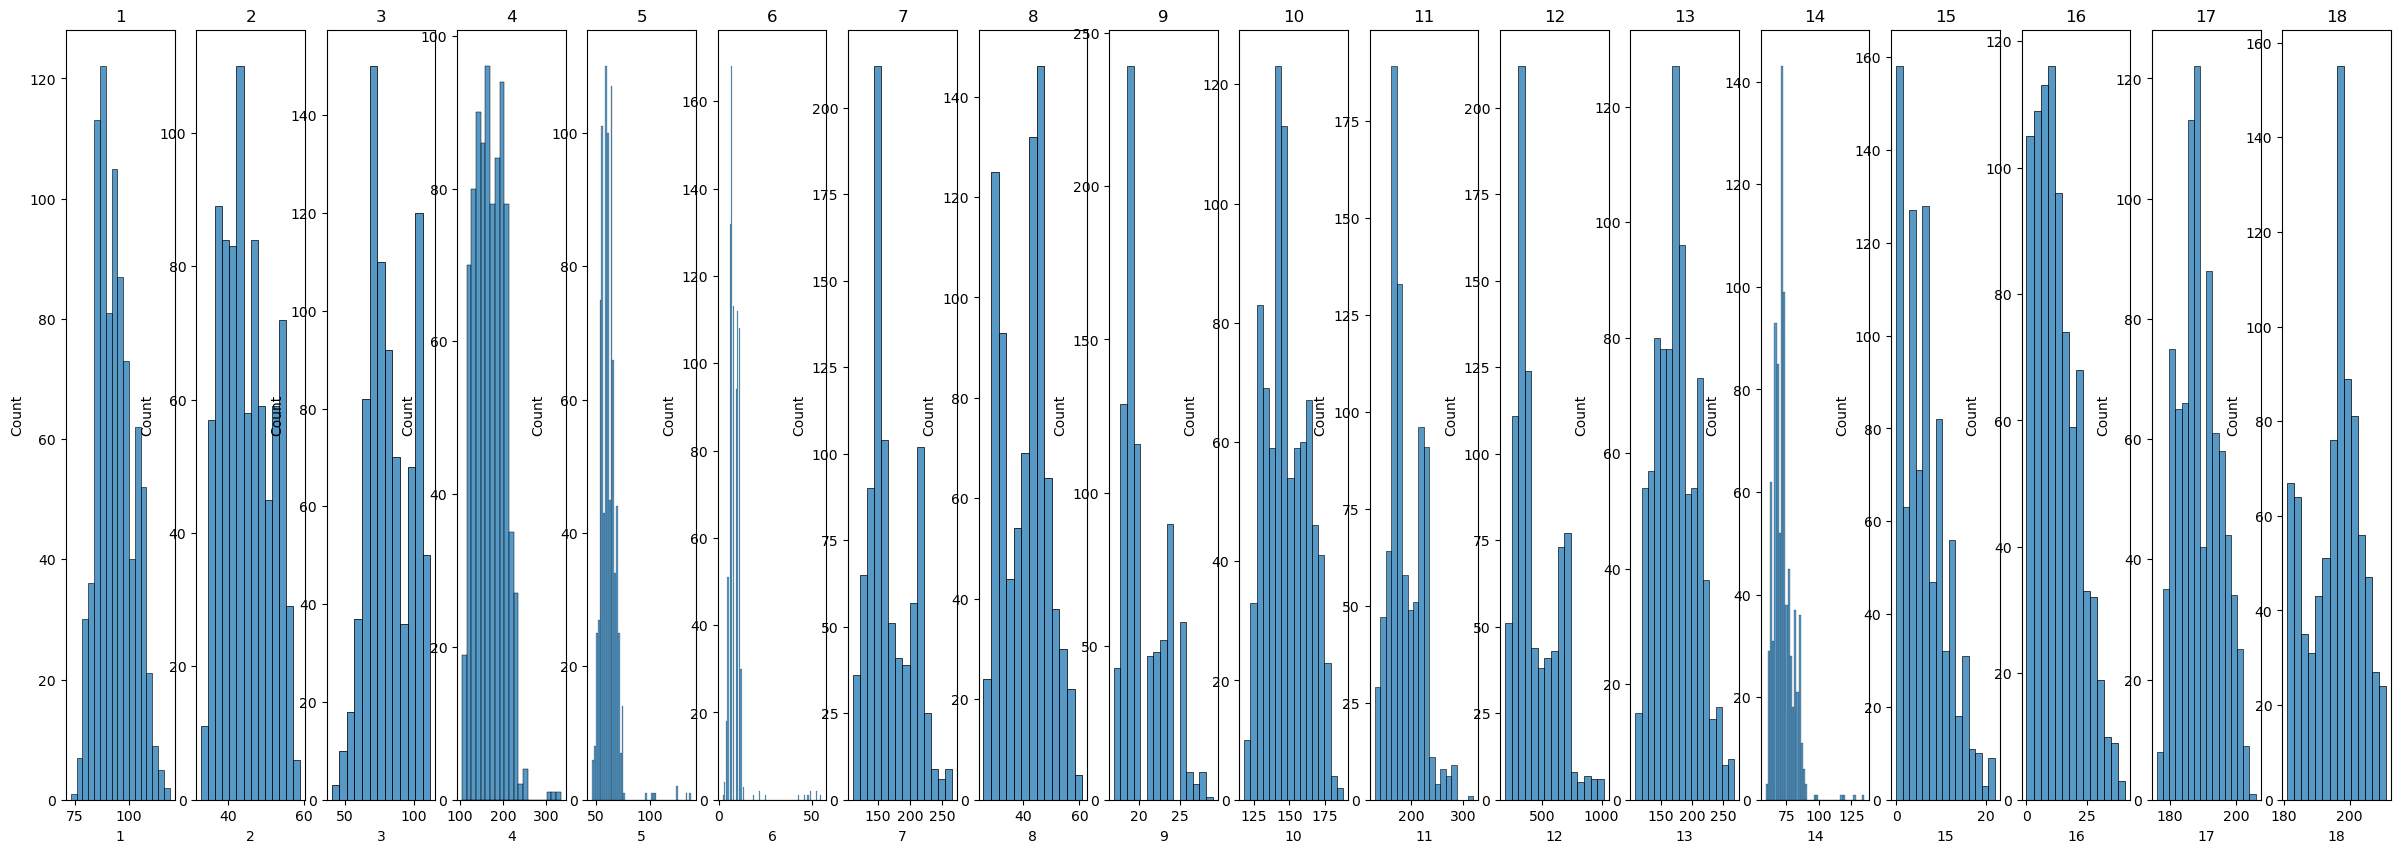

In [74]:
num_columns = len(data_df.columns)

# Создание подграфиков
fig, axes = plt.subplots(1, num_columns, figsize=(30, 10))

# Обход всех колонок и построение боксплота для каждой из них
for i, column in enumerate(data_df.columns):
    sns.histplot(data=data_df[column], ax=axes[i])
    axes[i].set_title(column)

# Отображение графиков
# plt.tight_layout()
plt.show()

> Признаки явно приходят из различных распределений. Часть признаков имеют явную мультимодальность и, вероятно, логнормальное распределение, следовательно лонарифмирование признаков может привести их распределение ближе к нормальному.


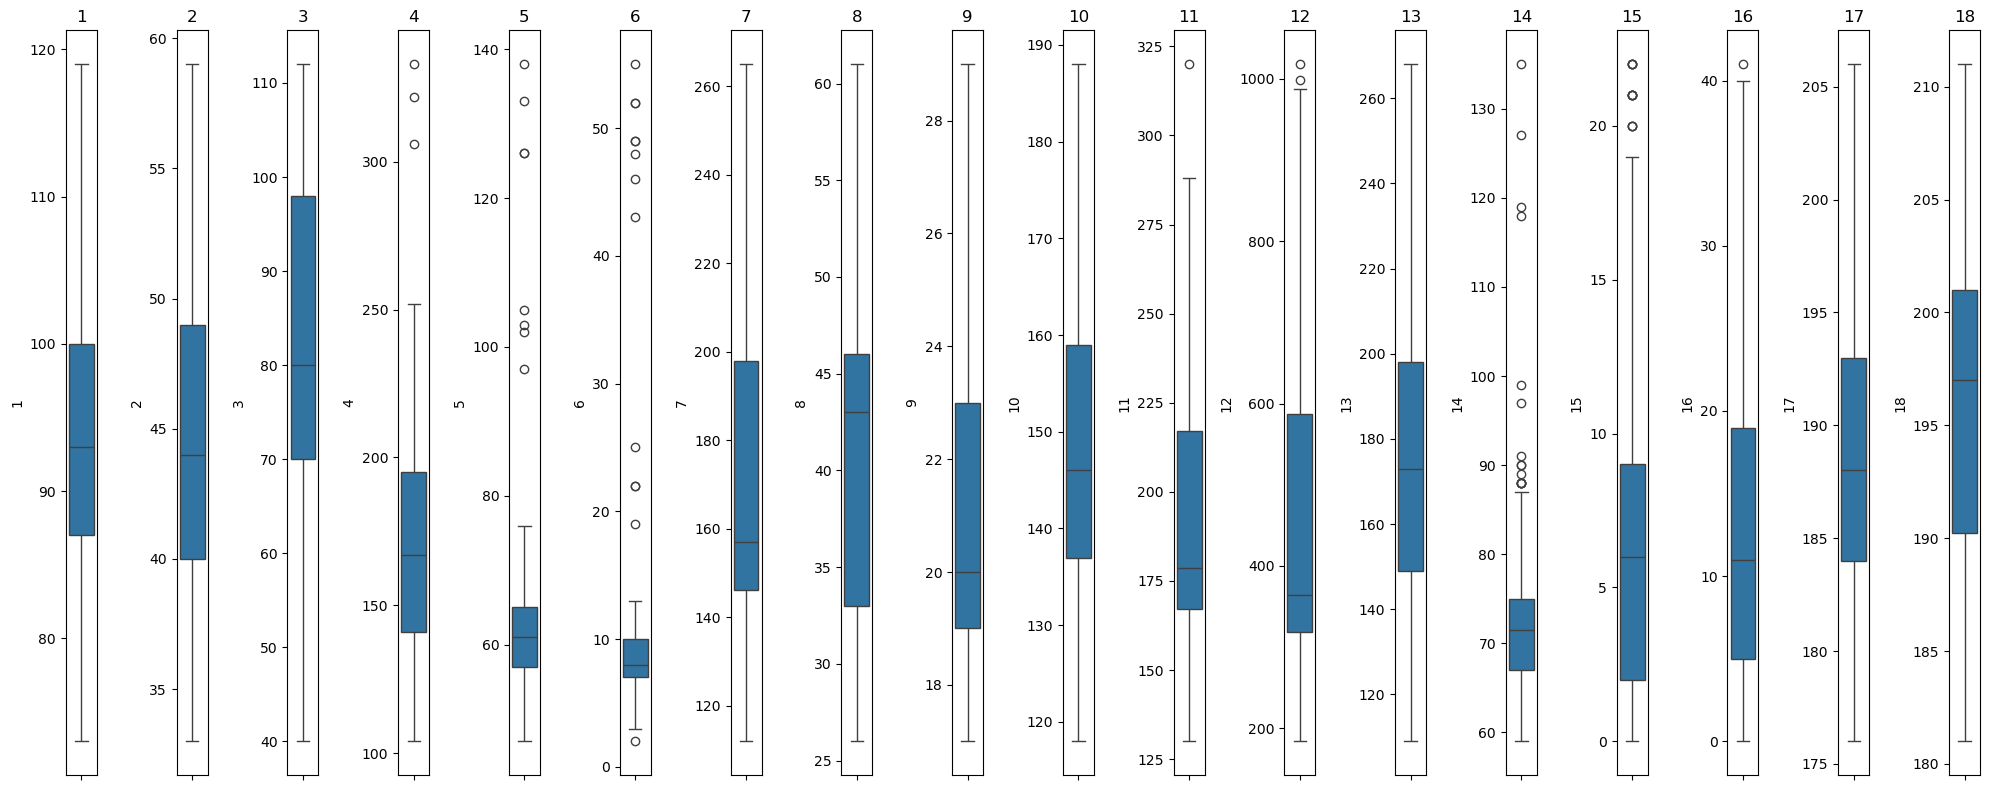

In [77]:
# Создание подграфиков
fig, axes = plt.subplots(1, num_columns, figsize=(20, 8))

# Обход всех колонок и построение боксплота для каждой из них
for i, column in enumerate(data.columns[:-1]):
    sns.boxplot(data=data[column], ax=axes[i])
    axes[i].set_title(column)

# Отображение графиков
plt.tight_layout()
plt.show()

> По ряду признаков существует вероятность наличия выбросов.

In [234]:
data = outliers_z_score(data, feature=4)
data = outliers_z_score(data, feature=5)
data = outliers_z_score(data, feature=6)
data = outliers_z_score(data, feature=11)
data = outliers_z_score(data, feature=12)
data = outliers_z_score(data, feature=14)
data = outliers_z_score(data, feature=15)
data = outliers_z_score(data, feature=16)

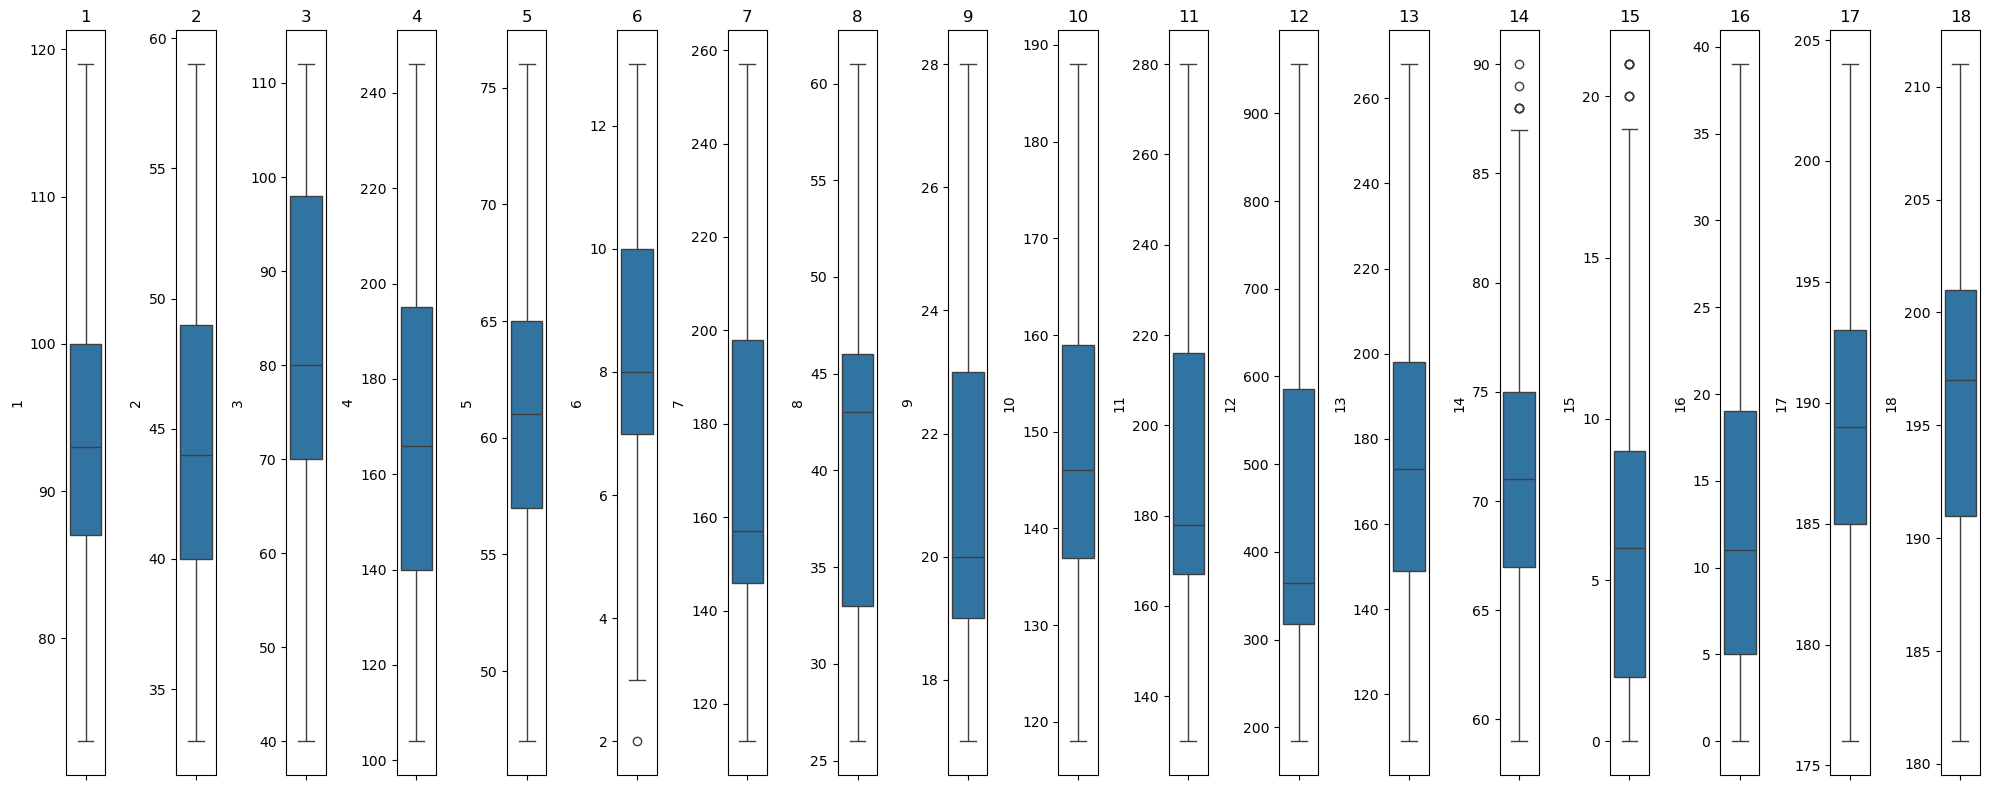

In [79]:
# Создание подграфиков
fig, axes = plt.subplots(1, num_columns, figsize=(20, 8))

# Обход всех колонок и построение боксплота для каждой из них
for i, column in enumerate(data.columns[:-1]):
    sns.boxplot(data=data[column], ax=axes[i])
    axes[i].set_title(column)

# Отображение графиков
plt.tight_layout()
plt.show()

> Ситация улучшилась

### Посмотрим на пропорции таргета

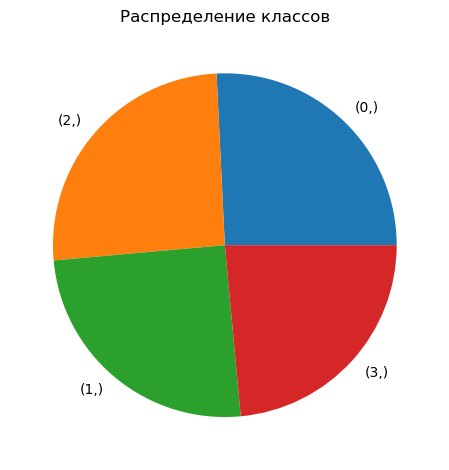

In [80]:
pie_data = y_target.value_counts(normalize=True)

plt.pie(x=pie_data, labels=pie_data.index)
plt.title("Распределение классов")

plt.tight_layout()
plt.show()

> Классы сбалансированы

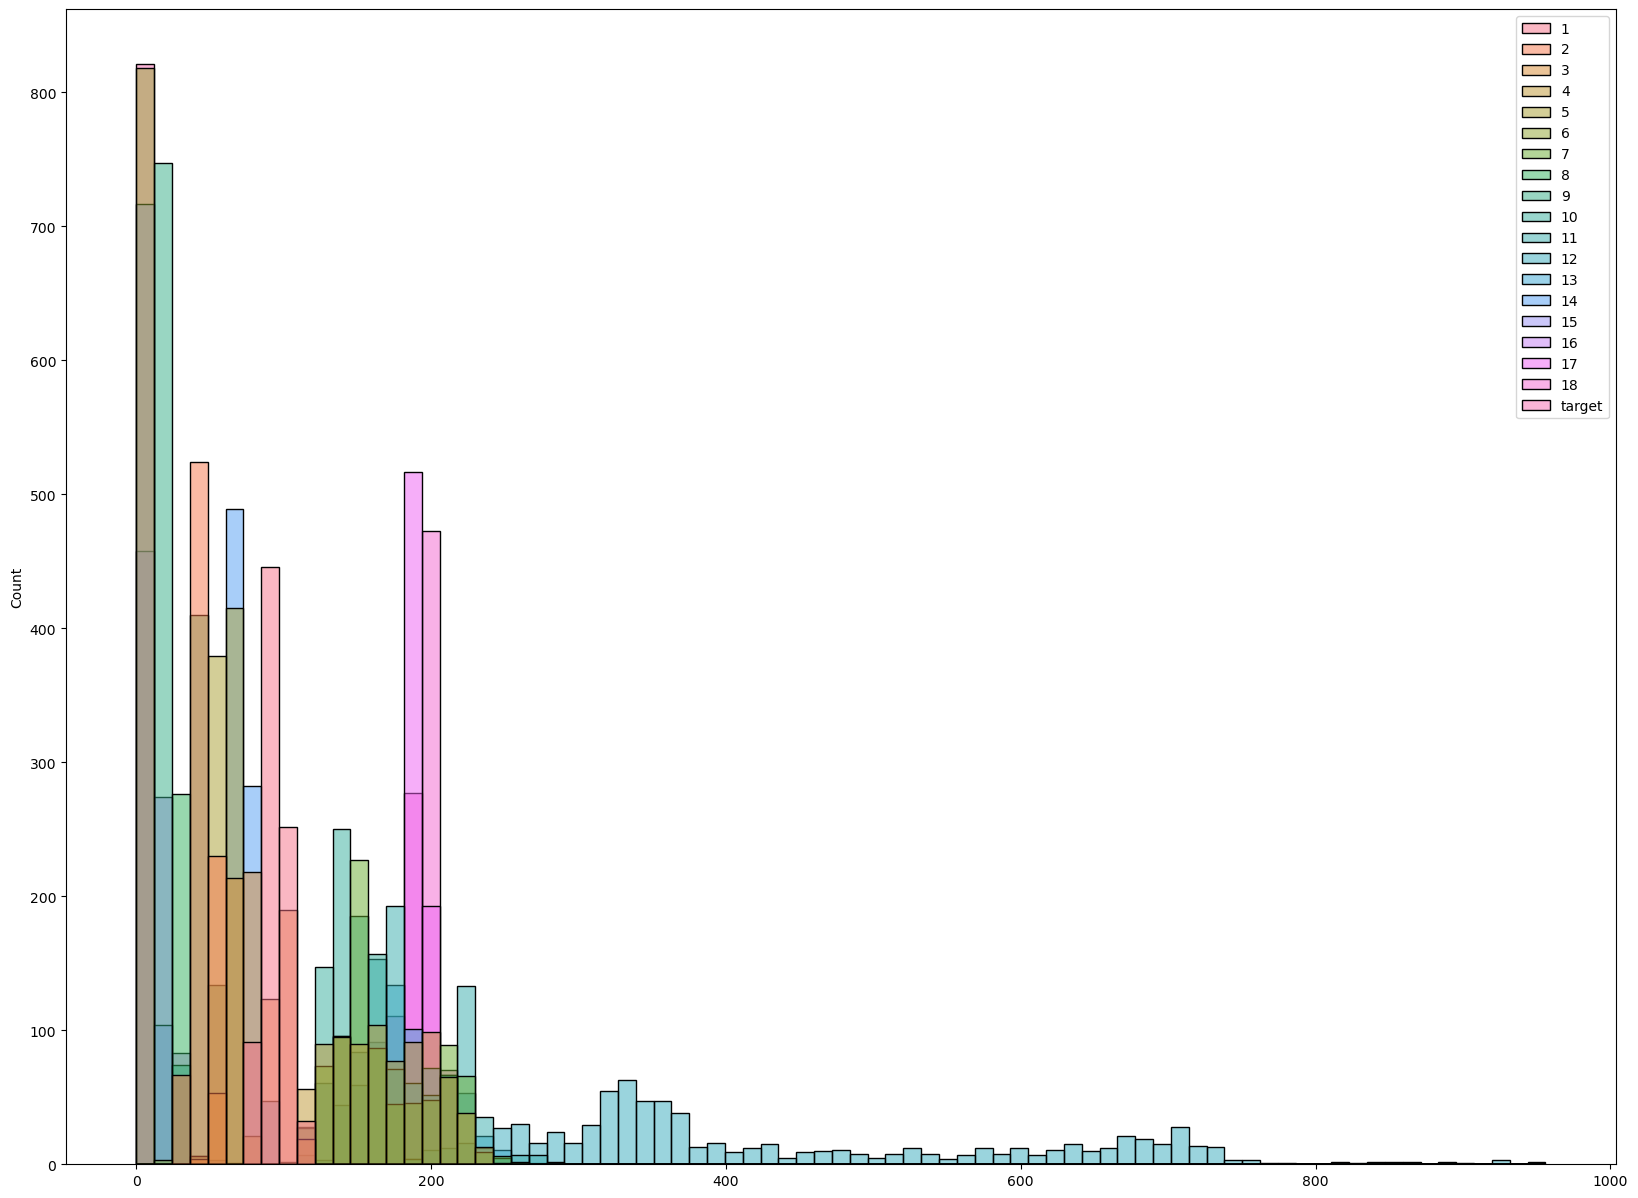

In [81]:
fig, axes = plt.subplots(1, 1, figsize=(20, 15))
sns.histplot(data=data, ax=axes)
plt.show()

> Можно наблюдать различие масштабов признаков - требуется нормальнизация.

### Проведем анализ на мультиколлинеарность признаков и влияние на таргет, для последующих этапов.

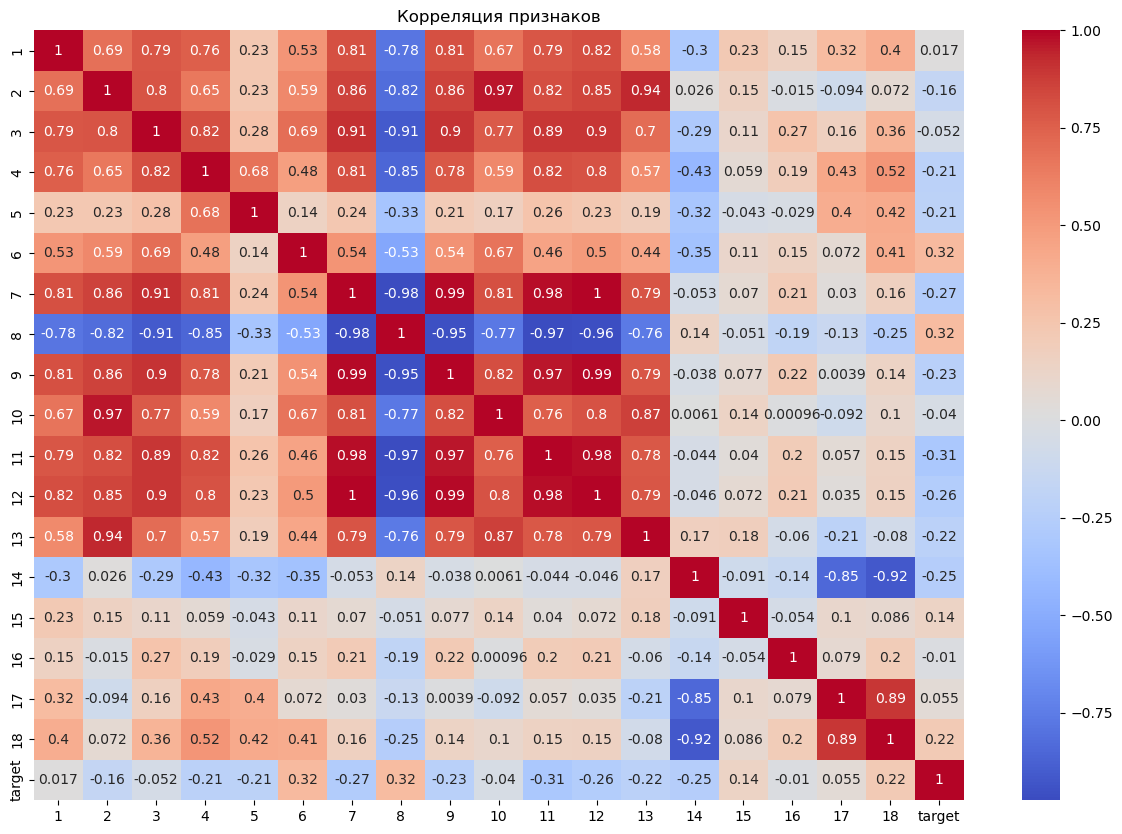

In [82]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, ax=axes, cmap='coolwarm')
plt.title("Корреляция признаков")
plt.show()

> Корреляция на таргет у признаков не высокая, а вот мультиколлинеарность заметная, что говорит о том, что в простейщем варианте можно было бы дропать фиты, но так как в дальнейших заданиях у нас имеется метод главных компонент, выявим подмножество/ва признаков для этапа PCA.

> Так же видна вероятная кластеризация фитов по мультикору.


In [83]:
multicor_finder(data, threshold=0.89)

Сформированные группы: [[7, 3, 8, 9, 11, 12], [10, 2, 13], [18, 14, 17]]


[[7, 3, 8, 9, 11, 12], [10, 2, 13], [18, 14, 17]]

> Почистим каждый полученный кластер исходя из приоритета корреляции на таргет.

In [173]:
data_cleaned = data.copy()
#data_cleaned = data.drop(columns=[17, 10, 3, 12, 2, 7, 9, 8, 1, 16])

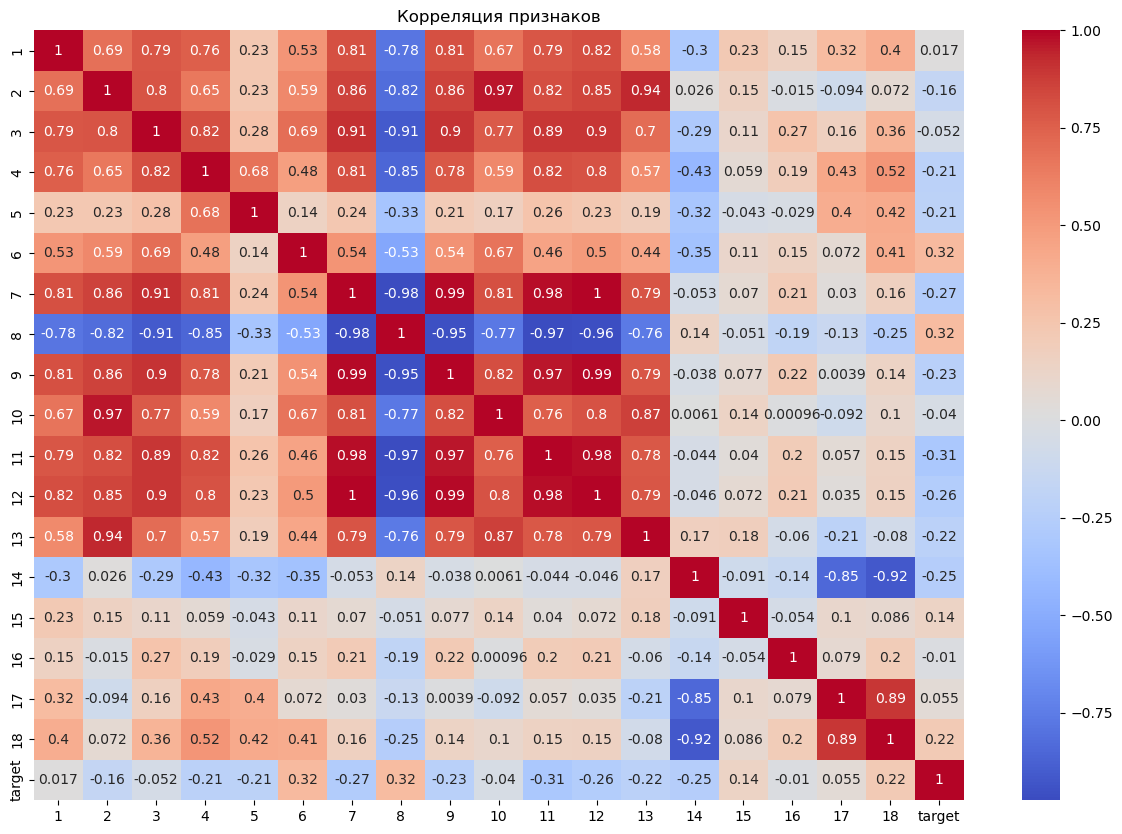

In [174]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(data_cleaned.corr(), annot=True, ax=axes, cmap='coolwarm')
plt.title("Корреляция признаков")
plt.show()

In [235]:
multicor_finder(data_cleaned, threshold=0.89)

Сформированные группы: [[7, 3, 8, 9, 11, 12], [10, 2, 13], [18, 14, 17]]


[[7, 3, 8, 9, 11, 12], [10, 2, 13], [18, 14, 17]]

> Убрали мультиколлинеарность

---
### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [176]:
# Опять разведем таргет и фиты для логарифмирования
X = data_cleaned.drop(columns=['target'])
y = data_cleaned['target']

In [177]:
log_transformer = LogTransformer()
X_log = X.copy()
X_log = log_transformer.fit_transform(X)
X_log.head()

1         2         3         4         5         6         7  \
0  4.564348  3.891820  4.430817  5.187386  4.290459  2.397895  5.093750   
1  4.521789  3.737670  4.442651  4.955827  4.060443  2.302585  5.010635   
2  4.653960  3.931826  4.672829  5.347108  4.204693  2.397895  5.337538   
3  4.543295  3.737670  4.418841  5.075174  4.158883  2.302585  4.976734   
6  4.584967  3.784190  4.304065  5.159055  4.189655  1.945910  5.036953   

          8         9        10        11        12        13        14  \
0  3.761200  3.044522  5.075174  5.176150  5.940171  5.220356  4.262680   
1  3.828641  2.995732  4.969813  5.141664  5.802118  5.068904  4.290459   
2  3.496508  3.178054  5.068904  5.411646  6.455199  5.398163  4.304065   
3  3.850148  2.995732  4.969813  5.081404  5.736572  4.852030  4.158883   
6  3.761200  2.995732  4.969813  5.176150  5.891644  5.153292  4.204693   

         15        16        17        18  
0  1.945910  2.833213  5.236442  5.288267  
1  2.302585  2.708050  5.247024  5.298317  
2  2.708050  2.302585  5.241747  5.283204  
3  1.945910  2.397895  5.298317  5.337538  
6  2.639057  0.693147  5.303305  5.323010

In [178]:
# Разобъем на трейн-тест
X_train, X_test, y_train, y_test = train_test_split(
    X_log, y, test_size=0.35, random_state=42)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(533, 18) (533,) (288, 18) (288,)


### Стандартизируем X_train, X_test

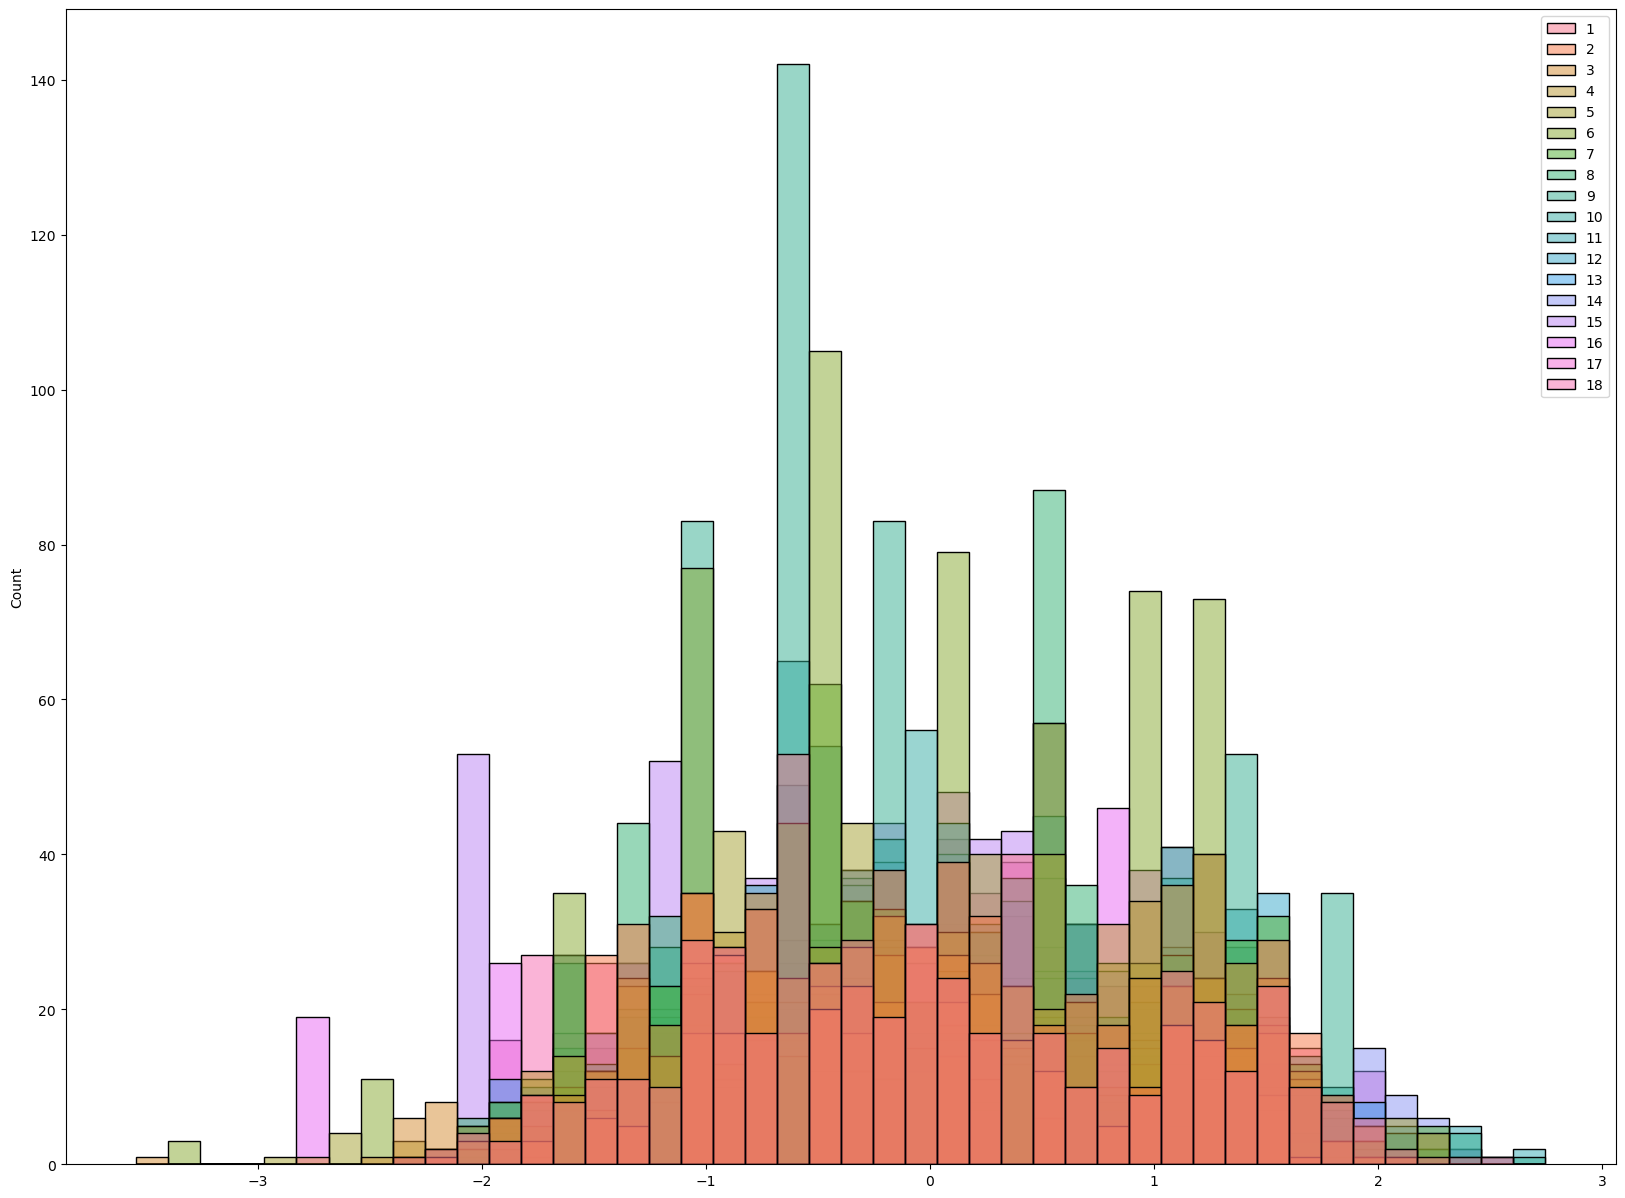

In [179]:
# Инициализируем объект класса скалеров
st_scal = StandardScaler()

# Отскалируем X_train/X_test
X_train_sc = st_scal.fit_transform(X_train)
X_test_sc = st_scal.transform(X_test)

X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

# Посмотрим на распределения на примере трейна
fig, axes = plt.subplots(1, 1, figsize=(20, 15))
sns.histplot(data=X_train_sc, ax=axes)
plt.show()

> Можно видеть, что признаки привидены к +/- одному масштабу и схожему распределению.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

F1 на test: 0.7724
Accuracy на test: 0.7812
ROC-score на test: 0.9405


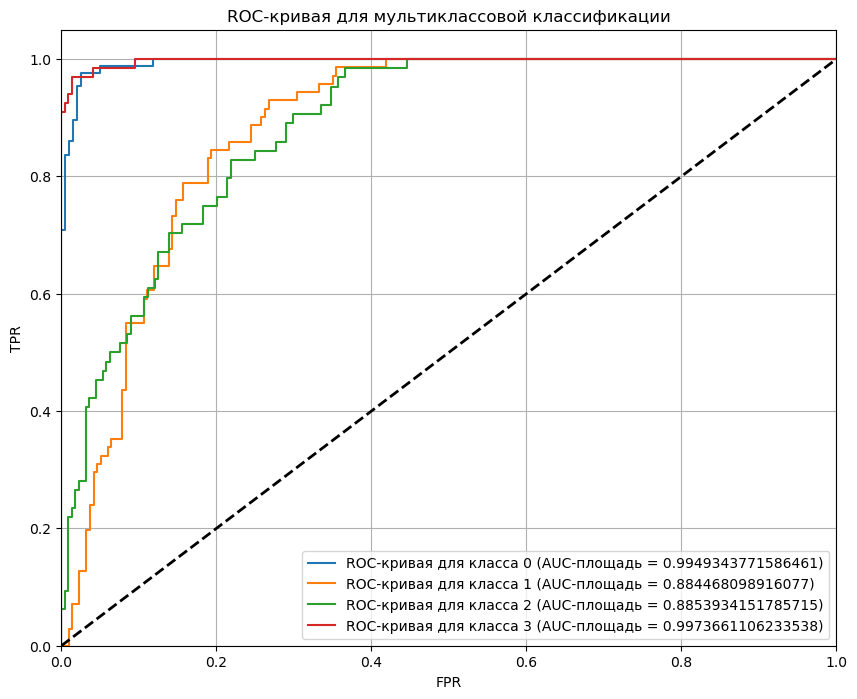

F1 на train: 0.8209
Accuracy на train: 0.8105
ROC-score на train: 0.9556


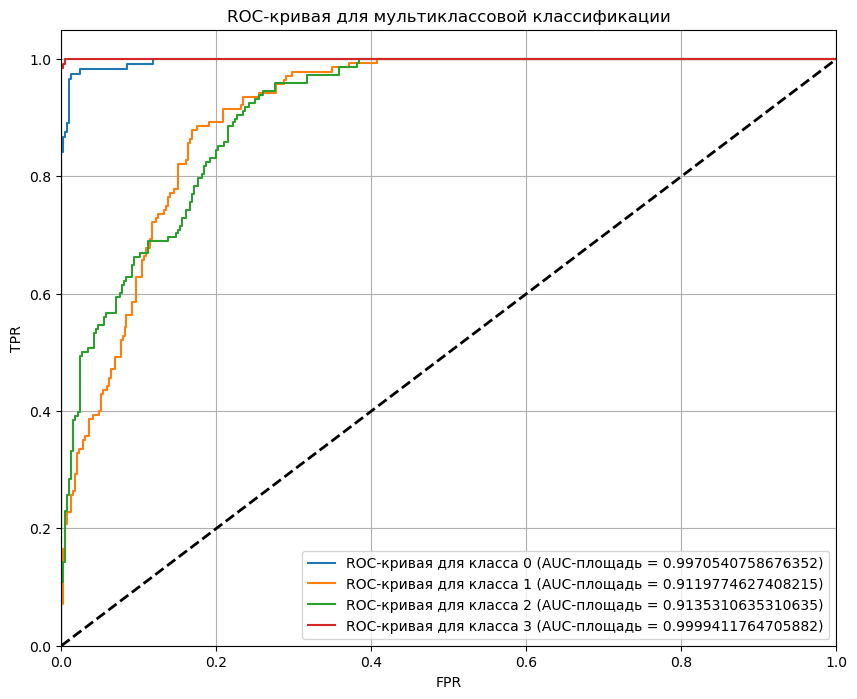

In [180]:
# Используем скорер-мейкеры для использования в
# грид-серче, используем взвешенный расчет
f1 = make_scorer(f1_score, average='weighted')
accuracy = make_scorer(accuracy_score, sample_weigh='weighted')

estimator = LogisticRegression(
    # multi_class="multinomial", # уберу для тушения ворнингов
    solver="saga",
    tol=1e-3,
    max_iter=500,
    n_jobs=-1,
    random_state=42
)

param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': [
        'elasticnet'], 'l1_ratio': [0, 0.5, 1]},
]

# Пройдемся по сетке со скорингом из двух метрик
base_log_reg = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    return_train_score=True,
    scoring=f1,
    n_jobs=-1
)

base_log_reg.fit(X_train_sc, y_train)

# Предсказания на тестовых данных
y_pred = base_log_reg.predict(X_test_sc)
y_pred_proba = base_log_reg.predict_proba(X_test_sc)

y_pred_train = base_log_reg.predict(X_train_sc)
y_pred_proba_train = base_log_reg.predict_proba(X_train_sc)

# Расчитаем метрики на подобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)
# Проверим на переобучение
metrics_estimation(
    y_train, y_pred_train, 
    y_pred_proba_train, label='train')

> Виден дисбаланс в качестве классификации, хотя классы относительно сбалансированы.

/opt/homebrew/Caskroom/miniconda/base/envs/dlenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dlenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dlenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dlenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dlenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was

F1 на test: 0.7724
Accuracy на test: 0.7812
ROC-score на test: 0.9405


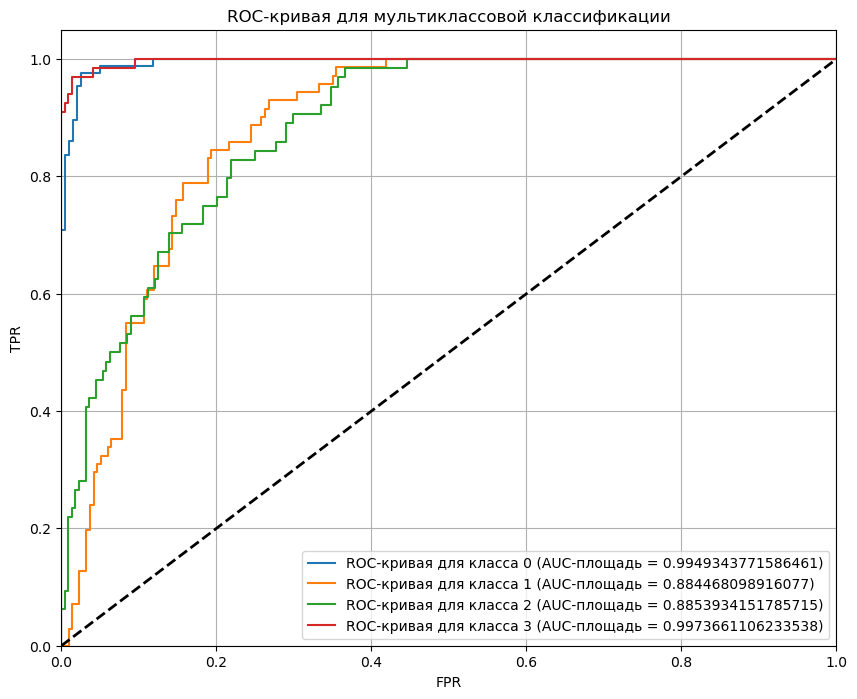

F1 на train: 0.8209
Accuracy на train: 0.8105
ROC-score на train: 0.9556


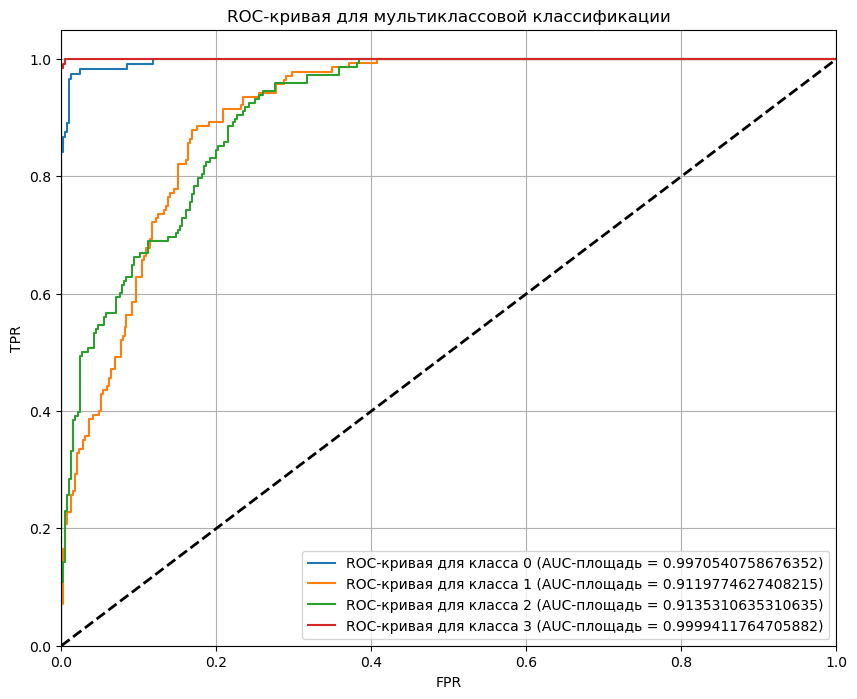

In [181]:
# грид-серче, используем взвешенный расчет
class_weights_options = [
    {0: 0.6, 1: 5, 2: 5, 3: 0.6},
    {0: 1, 1: 1, 2: 1, 3: 1},  # Равные веса для сравнения
    {0: 1, 1: 2, 2: 2, 3: 1}   # Увеличенные веса для классов 1 и 2
]
estimator = LogisticRegression(
    # multi_class="multinomial", # уберу для тушения ворнингов
    solver="saga",
    tol=1e-3,
    max_iter=4000,
    n_jobs=-1,
    random_state=42
)

# Инициализация списка параметров для сетки
param_grid = []
for class_weights in class_weights_options:
    param_grid.append({
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'class_weight': [class_weights]
    })
    param_grid.append({
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1'],
        'class_weight': [class_weights]
    })
    param_grid.append({
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['elasticnet'],
        'l1_ratio': [0, 0.5, 1],
        'class_weight': [class_weights]
    })

# Пройдемся по сетке со скорингом из двух метрик
base_log_reg_weighted = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    return_train_score=True,
    scoring=f1,
    n_jobs=-1
)

base_log_reg_weighted.fit(X_train_sc, y_train)

# Предсказания на тестовых данных
y_pred = base_log_reg_weighted.predict(X_test_sc)
y_pred_proba = base_log_reg_weighted.predict_proba(X_test_sc)

y_pred_train = base_log_reg_weighted.predict(X_train_sc)
y_pred_proba_train = base_log_reg_weighted.predict_proba(X_train_sc)

# Расчитаем метрики на подобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)
# Проверим на переобучение
metrics_estimation(
    y_train, y_pred_train, 
    y_pred_proba_train, label='train')

> Взвешивание не дало результатов

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Общее количество фитов:18


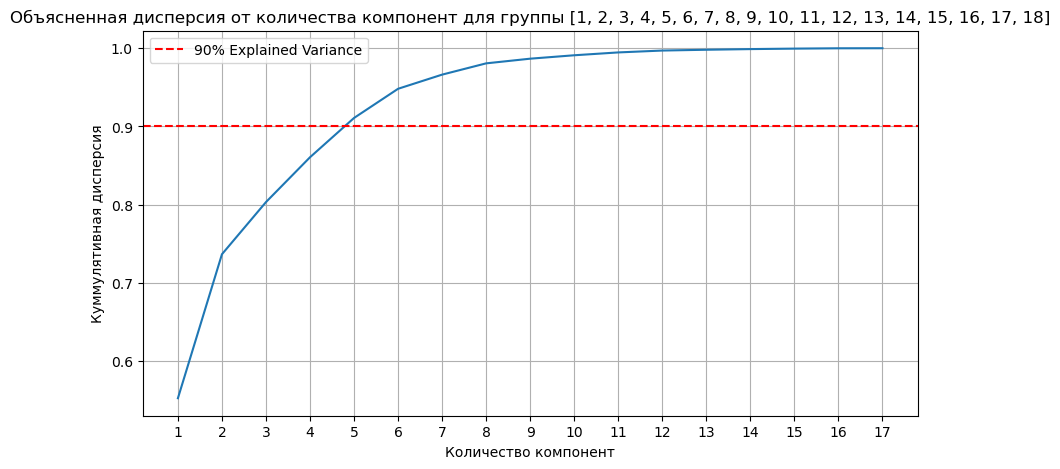

In [182]:
# Визуализируем процент описанной дисперсии от количества комонент
pca_group_whole = X_train_sc.columns.to_list()

print(f"Общее количество фитов:{len(pca_group_whole)}")

var_visualisation(pca_group_whole, X_train_sc) # см.функцию в блоке функций

> Для решения задачи использовалась функция из тех.блока

> Оптимально взять 8 фитов (наибольший процент описаной дисперсии).

> Данные уже стандартизированы.

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [201]:
pca = PCA(n_components=16)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

F1 на test: 0.7762
Accuracy на test: 0.7847
ROC-score на test: 0.9399


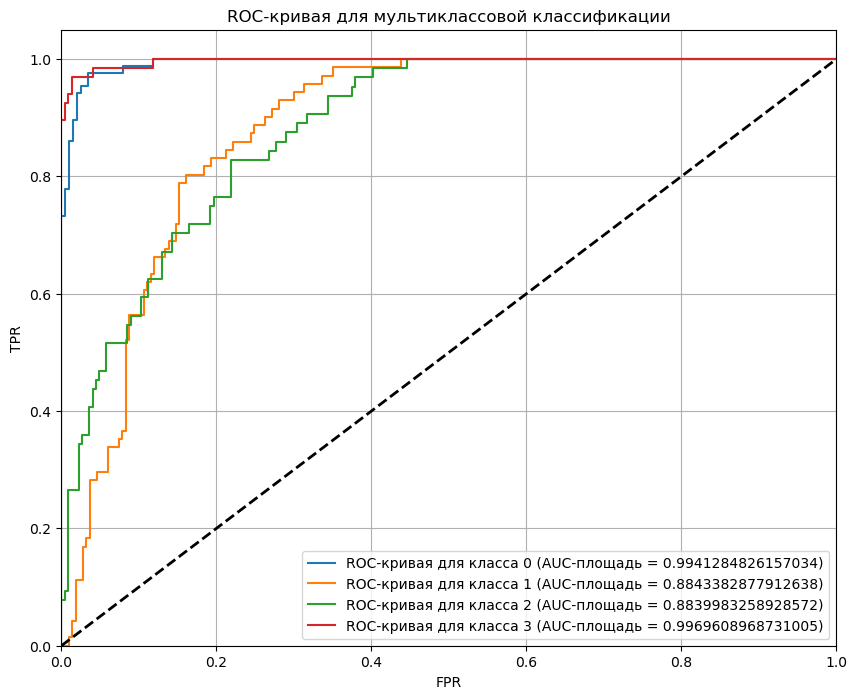

F1 на train: 0.8173
Accuracy на train: 0.8068
ROC-score на train: 0.9548


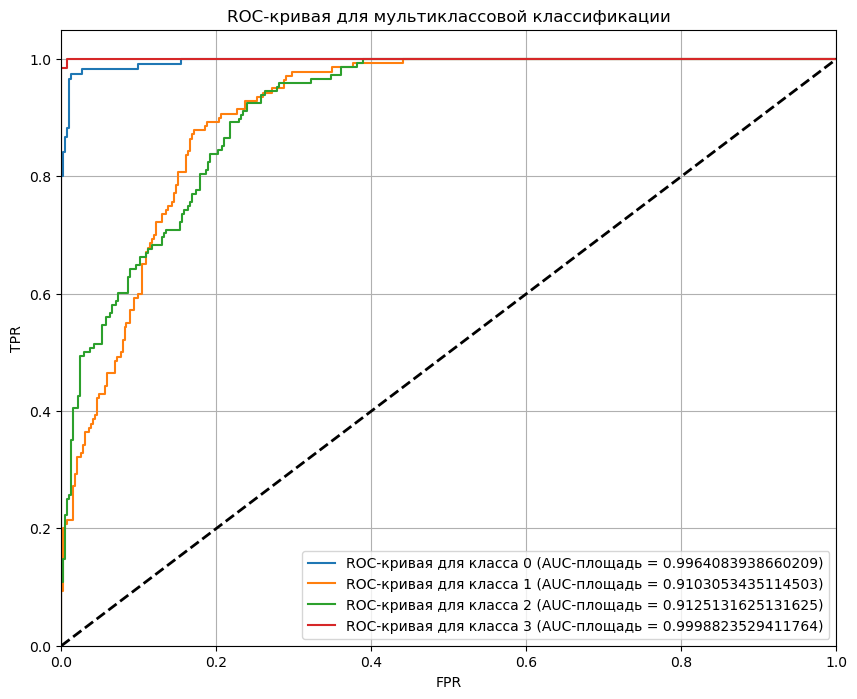

In [202]:
# YOUR CODE HERE
estimator = LogisticRegression(
    # multi_class="multinomial", # уберу для тушения ворнингов
    solver="saga",
    tol=1e-3,
    max_iter=1000,
    n_jobs=-1
)

param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': [
        'elasticnet'], 'l1_ratio': [0, 0.5, 1]},
]

# Пройдемся по сетке со скорингом из двух метрик
pca_log_reg = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    return_train_score=True,
    scoring=f1,
    refit=True,
    n_jobs=-1
)

pca_log_reg.fit(X_train_pca, y_train)

# Предсказания на тестовых данных
y_pred = pca_log_reg.predict(X_test_pca)
y_pred_proba = pca_log_reg.predict_proba(X_test_pca)

y_pred_train = pca_log_reg.predict(X_train_pca)
y_pred_proba_train = pca_log_reg.predict_proba(X_train_pca)

# Расчитаем метрики на подобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)
# Проверим на переобучение
metrics_estimation(
    y_train, y_pred_train, 
    y_pred_proba_train, label='train')

> Вывод

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

F1 на test: 0.6494
Accuracy на test: 0.6597
ROC-score на test: 0.7787


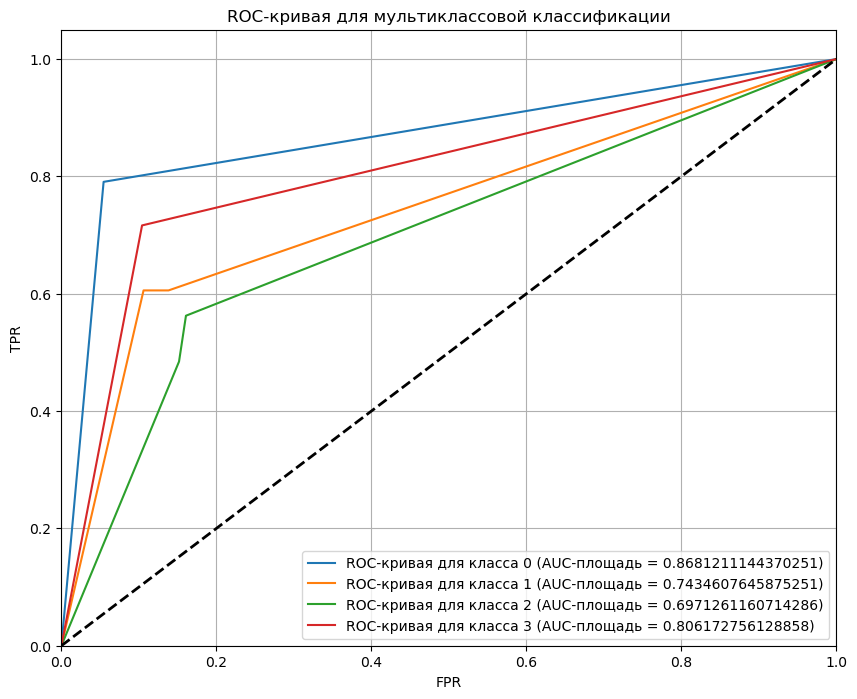

F1 на train: 0.9896
Accuracy на train: 0.9887
ROC-score на train: 0.9997


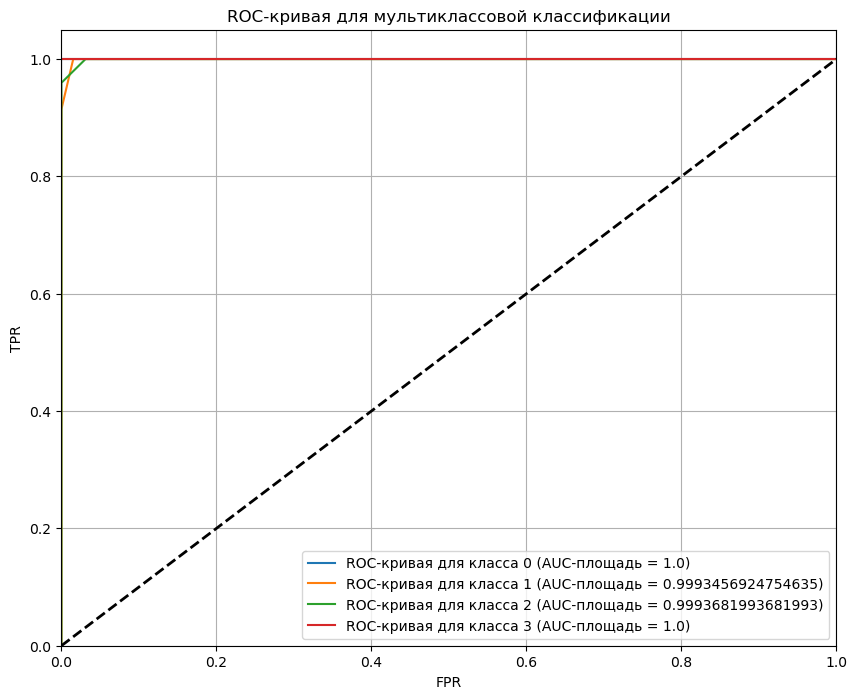

In [205]:
# YOUR CODE HERE

f1 = make_scorer(f1_score, average='macro')
accuracy = make_scorer(accuracy_score, sample_weigh='weighted')

estimator = DecisionTreeClassifier(
    random_state=42
)

# Определяем параметры для поиска
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

# Пройдемся по сетке со скорингом из двух метрик
scaled_tree = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    return_train_score=True,
    scoring=f1,
    refit=True,
    n_jobs=-1
)

scaled_tree.fit(X_train_pca, y_train)

# Предсказания на тестовых данных
y_pred = scaled_tree.predict(X_test_pca)
y_pred_proba = scaled_tree.predict_proba(X_test_pca)


y_pred_train = scaled_tree.predict(X_train_pca)
y_pred_proba_train = scaled_tree.predict_proba(X_train_pca)

# Расчитаем метрики на подобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)
# Проверим на переобучение
metrics_estimation(
    y_train, y_pred_train, 
    y_pred_proba_train, label='train')

> Дерево переобучилось

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

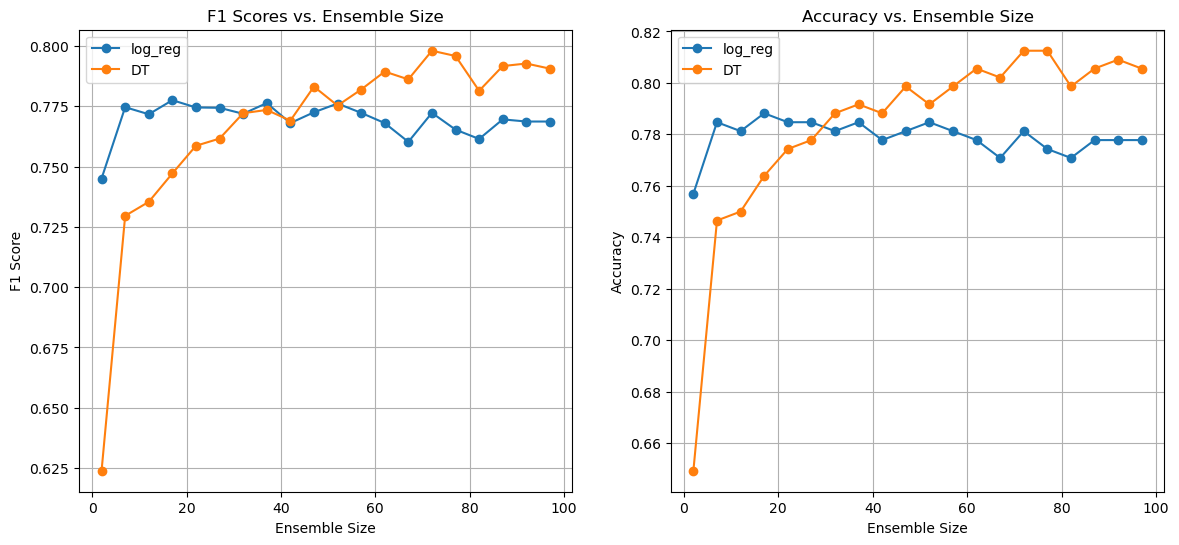

In [206]:
# YOUR CODE HERE
N_min = 2
N_max = 100
step = 5
ensemble_sizes = list(range(N_min, N_max + 1, step))
f1_scores_logreg = []
f1_scores_tree = []
accuracy_scores_logreg = []
accuracy_scores_tree = []

for N in ensemble_sizes:
    # Bagging для логистической регрессии
    logreg_bagging = BaggingClassifier(estimator=LogisticRegression(),
                                       n_estimators=N,
                                       random_state=42)
    logreg_bagging.fit(X_train_pca, y_train)
    y_pred_logreg = logreg_bagging.predict(X_test_pca)
    # Используем f1_score напрямую
    f1_scores_logreg.append(f1_score(y_test, y_pred_logreg, average='macro'))
    # Используем accuracy_score напрямую
    accuracy_scores_logreg.append(accuracy_score(y_test, y_pred_logreg))

    # Bagging для деревьев решений
    tree_bagging = BaggingClassifier(estimator=DecisionTreeClassifier(),
                                     n_estimators=N,
                                     random_state=42)
    tree_bagging.fit(X_train_pca, y_train)
    y_pred_tree = tree_bagging.predict(X_test_pca)
    # Используем f1_score напрямую
    f1_scores_tree.append(f1_score(y_test, y_pred_tree, average='macro'))
    # Используем accuracy_score напрямую
    accuracy_scores_tree.append(accuracy_score(y_test, y_pred_tree))

# Построение графиков остается без изменений
plt.figure(figsize=(14, 6))

# График F1-меры
plt.subplot(1, 2, 1)
plt.plot(ensemble_sizes, f1_scores_logreg,
         label='log_reg', marker='o')
plt.plot(ensemble_sizes, f1_scores_tree, label='DT', marker='o')
plt.title('F1 Scores vs. Ensemble Size')
plt.xlabel('Ensemble Size')
plt.ylabel('F1 Score')
plt.legend()
plt.grid()

# График точности
plt.subplot(1, 2, 2)
plt.plot(ensemble_sizes, accuracy_scores_logreg,
         label='log_reg', marker='o')
plt.plot(ensemble_sizes, accuracy_scores_tree,
         label='DT', marker='o')
plt.title('Accuracy vs. Ensemble Size')
plt.xlabel('Ensemble Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

F1 на test: 0.7963
Accuracy на test: 0.809
ROC-score на test: 0.945


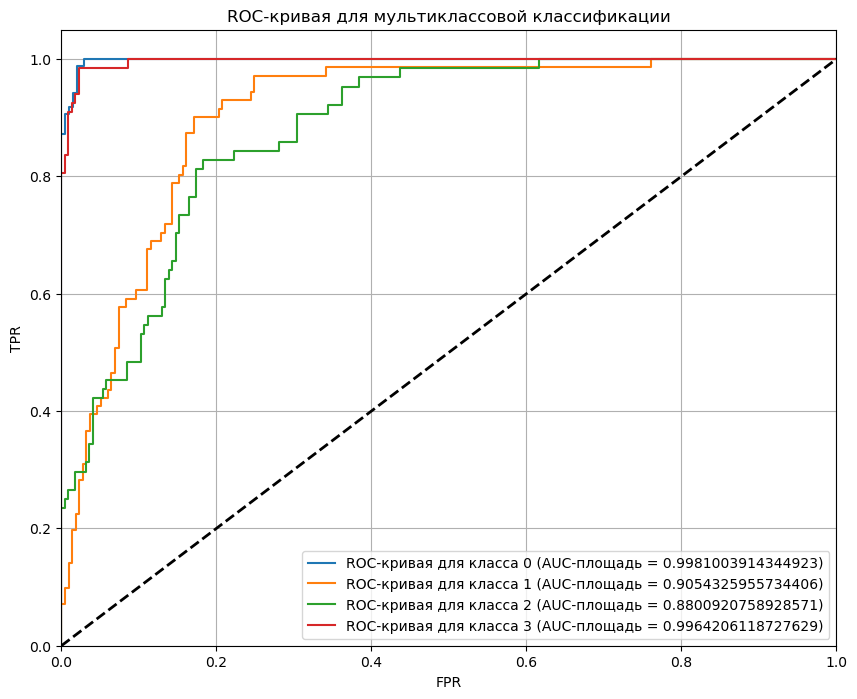

F1 на train: 1.0
Accuracy на train: 1.0
ROC-score на train: 1.0


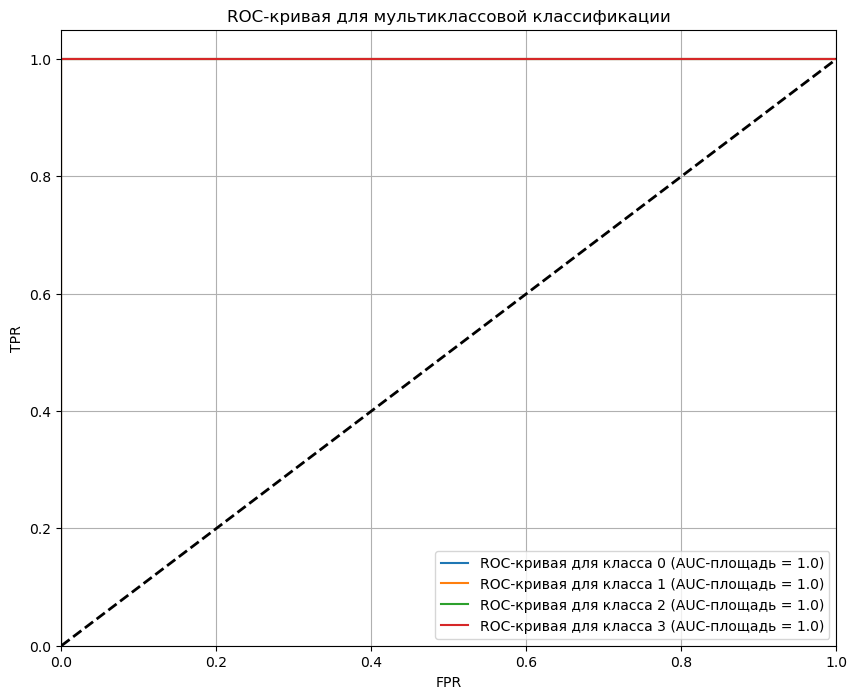

In [207]:
# YOUR CODE HERE
# Скопируем старый код
# Используем скорер-мейкеры для использования в
# грид-серче, используем взвешенный расчет
f1 = make_scorer(f1_score, average='macro')
accuracy = make_scorer(accuracy_score)

estimator = RandomForestClassifier(
    random_state=42
)

# Определяем параметры для поиска
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Создание скореров для нескольких метрик
scoring = {
    'f1': f1,
    'accuracy': accuracy
}

# Настройка RandomizedSearchCV
scaled_forest = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=param_grid,
    return_train_score=True,
    scoring=scoring,
    refit='f1',
    n_jobs=-1,
)

scaled_forest.fit(X_train_pca, y_train)

# Предсказания на тестовых данных
y_pred = scaled_forest.predict(X_test_pca)
y_pred_proba = scaled_forest.predict_proba(X_test_pca)

y_pred_train = scaled_forest.predict(X_train_pca)
y_pred_proba_train = scaled_forest.predict_proba(X_train_pca)

# Расчитаем метрики на подобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)
# Проверим на переобучение
metrics_estimation(
    y_train, y_pred_train, 
    y_pred_proba_train, label='train')

> Лес переобучился.

---

In [212]:
# Опять разведем таргет и фиты для логарифмирования
X = data.drop(columns=['target'])
y = data['target']

# Разбиваем на тренинговый и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=42)

In [213]:
n_components = 16
# Создаем Pipeline log-rega
log_reg_pipe = Pipeline([
    ('log_transformer', LogTransformer()),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('log_reg_pca', pca_log_reg)
])

# Pipe для дерева
dt_pipe = Pipeline([
    ('log_transformer', LogTransformer()),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('best_tree', scaled_tree)
])

# Pipe для беггинга
bag_pipe = Pipeline([
    ('log_transformer', LogTransformer()),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('bag', BaggingClassifier(
        estimator=LogisticRegression(),
        n_estimators=43,
        random_state=42))
])

# Pipe для леса
forest_pipe = Pipeline([
    ('log_transformer', LogTransformer()),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('rfc', scaled_forest)
])

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

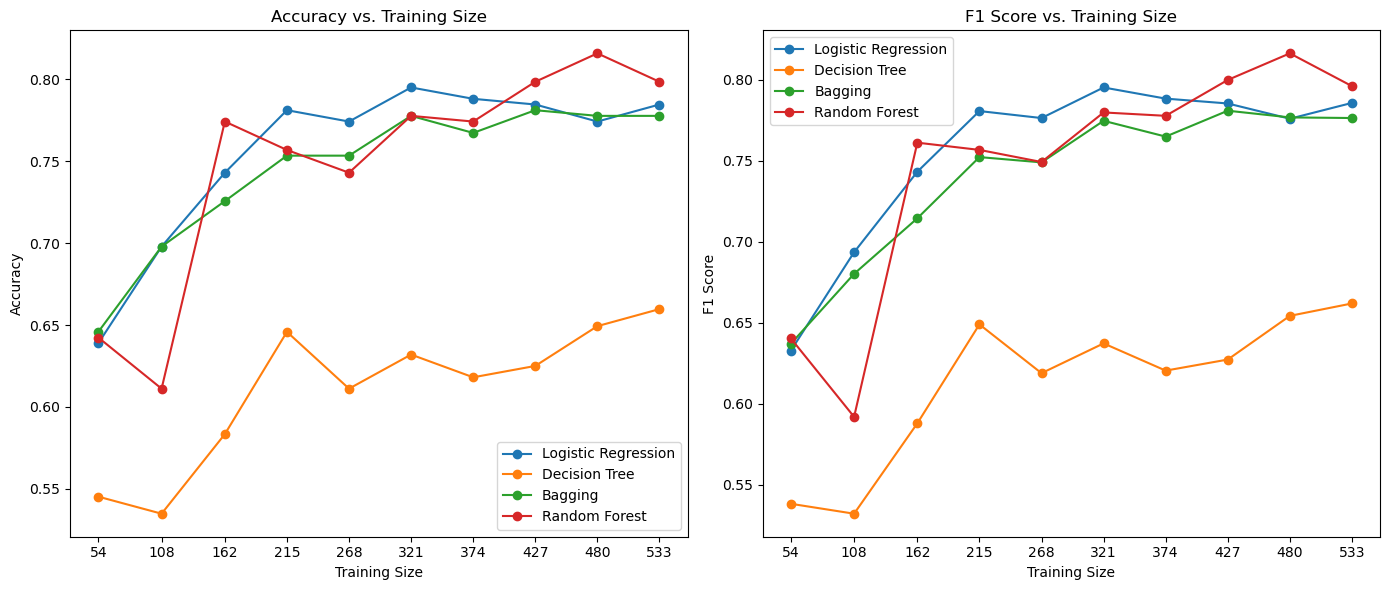

In [214]:
# YOUR CODE HERE
# Разделяем X_train и y_train на 10 частей
X_train_split = np.array_split(X_train, 10)
y_train_split = np.array_split(y_train, 10)

# Модели
models = {
    'Logistic Regression': log_reg_pipe,
    'Decision Tree': dt_pipe,
    'Bagging': bag_pipe,
    'Random Forest': forest_pipe
}

# Хранение метрик
results = {key: {'accuracy': [], 'f1': []} for key in models.keys()}

# Обучение моделей и расчет метрик с увеличением размера тренировочного набора
for i in range(1, 11):  # от 1 до 10
    X_train_subset = pd.concat(X_train_split[:i])
    y_train_subset = pd.concat(y_train_split[:i])

    for model_name, model in models.items():
        model.fit(X_train_subset, y_train_subset)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        results[model_name]['accuracy'].append(accuracy)
        results[model_name]['f1'].append(f1)

# Построение графиков
train_sizes = [len(pd.concat(X_train_split[:i])) for i in range(1, 11)]

plt.figure(figsize=(14, 6))

# График для Accuracy
plt.subplot(1, 2, 1)
for model_name, metrics in results.items():
    plt.plot(train_sizes, metrics['accuracy'], marker='o', label=model_name)
plt.title('Accuracy vs. Training Size')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.xticks(train_sizes)
plt.legend()

# График для F1 Score
plt.subplot(1, 2, 2)
for model_name, metrics in results.items():
    plt.plot(train_sizes, metrics['f1'], marker='o', label=model_name)
plt.title('F1 Score vs. Training Size')
plt.xlabel('Training Size')
plt.ylabel('F1 Score')
plt.xticks(train_sizes)
plt.legend()

plt.tight_layout()
plt.show()

### Ну и для тестовой

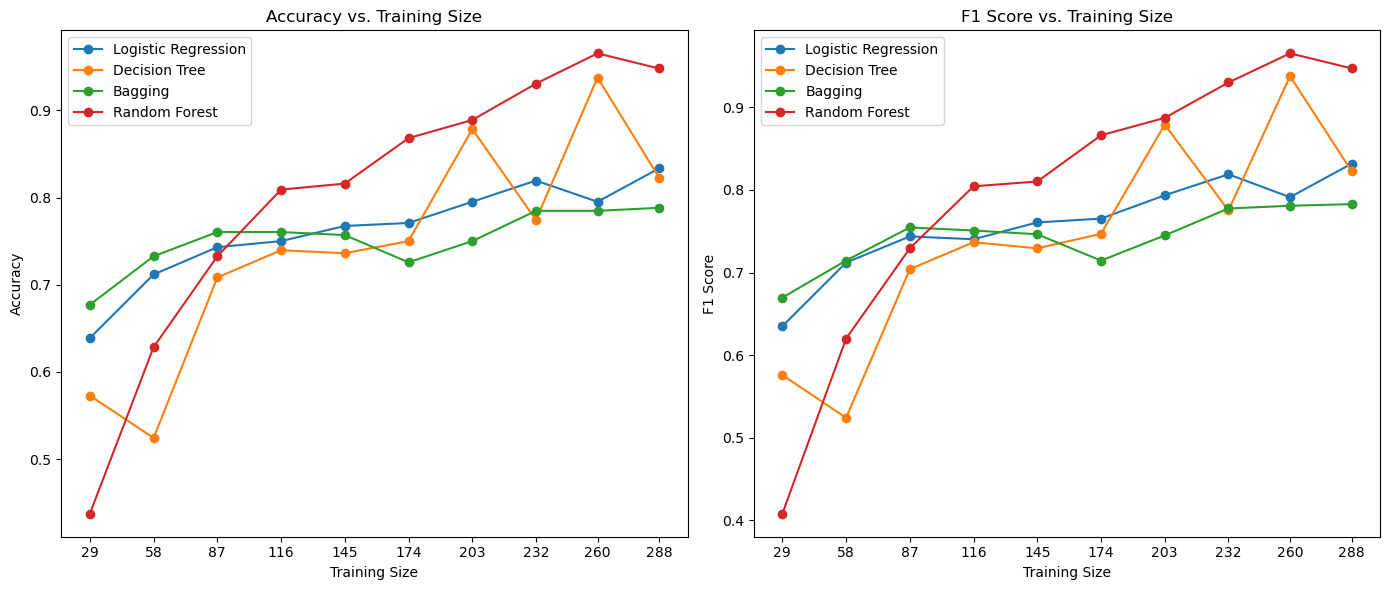

In [215]:
# YOUR CODE HERE
# Разделяем X_train и y_train на 10 частей
X_test_split = np.array_split(X_test, 10)
y_test_split = np.array_split(y_test, 10)

# Модели
models = {
    'Logistic Regression': log_reg_pipe,
    'Decision Tree': dt_pipe,
    'Bagging': bag_pipe,
    'Random Forest': forest_pipe
}

# Хранение метрик
results = {key: {'accuracy': [], 'f1': []} for key in models.keys()}

# Обучение моделей и расчет метрик с увеличением размера тренировочного набора
for i in range(1, 11):  # от 1 до 10
    X_test_subset = pd.concat(X_test_split[:i])
    y_test_subset = pd.concat(y_test_split[:i])

    for model_name, model in models.items():
        model.fit(X_test_subset, y_test_subset)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        results[model_name]['accuracy'].append(accuracy)
        results[model_name]['f1'].append(f1)

# Построение графиков
train_sizes = [len(pd.concat(X_test_split[:i])) for i in range(1, 11)]

plt.figure(figsize=(14, 6))

# График для Accuracy
plt.subplot(1, 2, 1)
for model_name, metrics in results.items():
    plt.plot(train_sizes, metrics['accuracy'], marker='o', label=model_name)
plt.title('Accuracy vs. Training Size')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.xticks(train_sizes)
plt.legend()

# График для F1 Score
plt.subplot(1, 2, 2)
for model_name, metrics in results.items():
    plt.plot(train_sizes, metrics['f1'], marker='o', label=model_name)
plt.title('F1 Score vs. Training Size')
plt.xlabel('Training Size')
plt.ylabel('F1 Score')
plt.xticks(train_sizes)
plt.legend()

plt.tight_layout()
plt.show()

----
### ЭЭЭксперименты

In [227]:
# Опять разведем таргет и фиты для логарифмирования
X = data.drop(columns=['target'])
y = data['target']

# Разбиваем на тренинговый и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [228]:
n_components = 16
# Создаем Pipeline log-rega
log_reg_pipe = Pipeline([
    ('log_transformer', LogTransformer()),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('log_reg_pca', pca_log_reg)
])

# Pipe для дерева
dt_pipe = Pipeline([
    ('log_transformer', LogTransformer()),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('best_tree', scaled_tree)
])

# Pipe для беггинга
bag_pipe = Pipeline([
    ('log_transformer', LogTransformer()),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('bag', BaggingClassifier(
        estimator=LogisticRegression(),
        n_estimators=43,
        random_state=42))
])

# Pipe для леса
forest_pipe = Pipeline([
    ('log_transformer', LogTransformer()),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('rfc', scaled_forest)
])

F1 на test: 0.7629
Accuracy на test: 0.7767
ROC-score на test: 0.9393


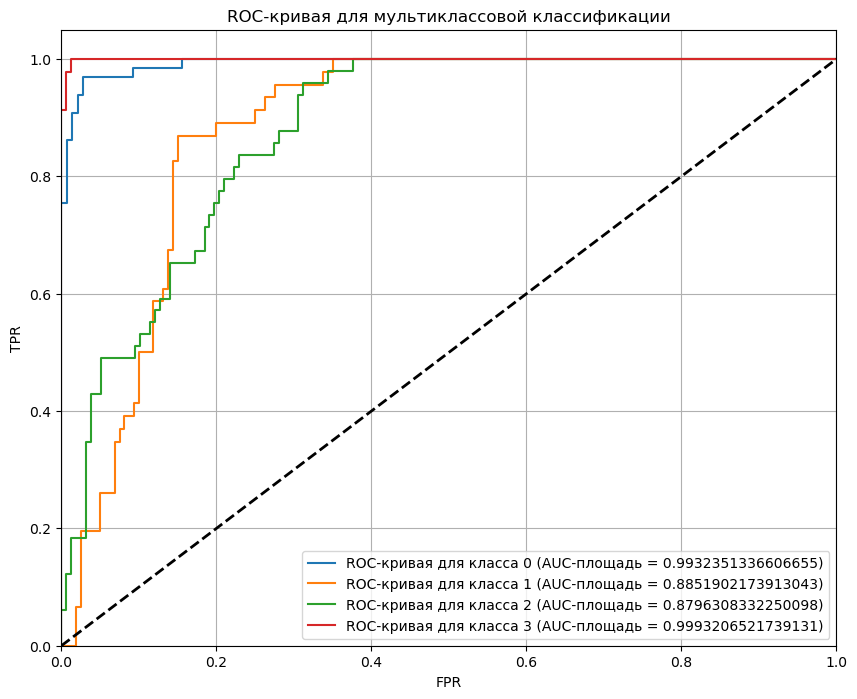

F1 на train: 0.8235
Accuracy на train: 0.8146
ROC-score на train: 0.9558


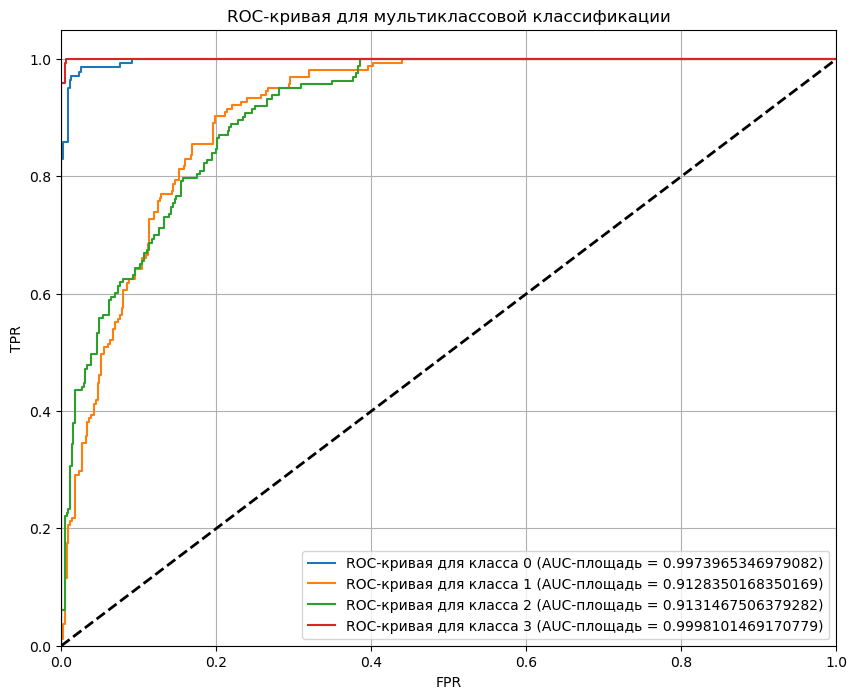

In [229]:
log_reg_pipe.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = log_reg_pipe.predict(X_test)
y_pred_proba = log_reg_pipe.predict_proba(X_test)

y_pred_train = log_reg_pipe.predict(X_train)
y_pred_proba_train = log_reg_pipe.predict_proba(X_train)

# Расчитаем метрики на подобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)
# Проверим на переобучение
metrics_estimation(
    y_train, y_pred_train, 
    y_pred_proba_train, label='train')

F1 на test: 0.6974
Accuracy на test: 0.7039
ROC-score на test: 0.8157


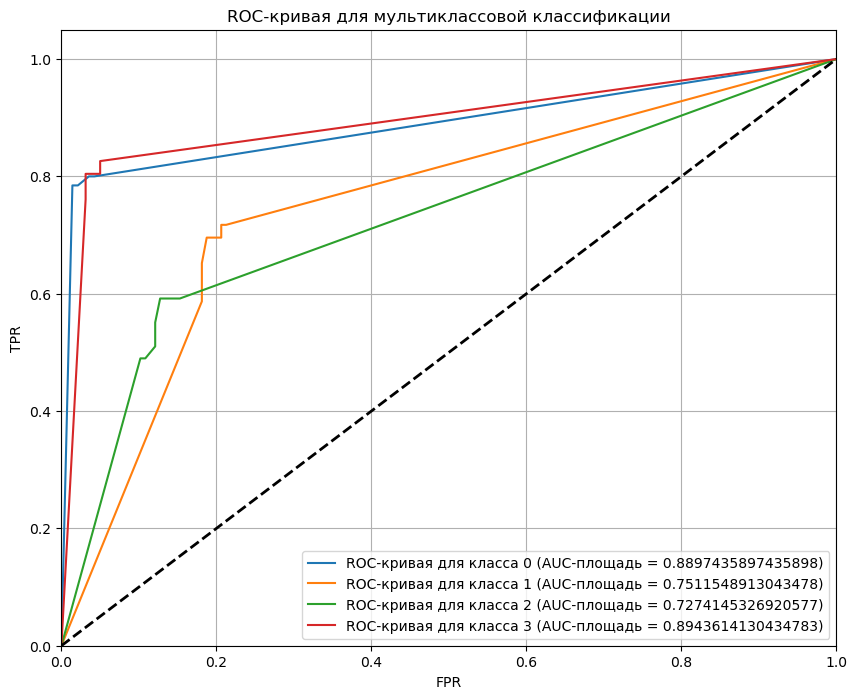

F1 на train: 0.9533
Accuracy на train: 0.9528
ROC-score на train: 0.9984


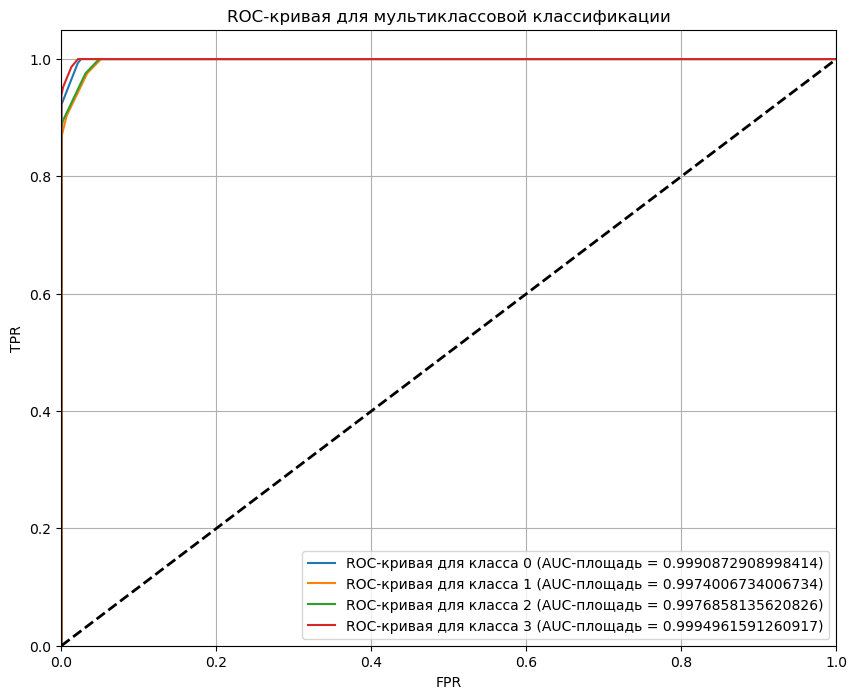

In [230]:
dt_pipe.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = dt_pipe.predict(X_test)
y_pred_proba = dt_pipe.predict_proba(X_test)

y_pred_train = dt_pipe.predict(X_train)
y_pred_proba_train = dt_pipe.predict_proba(X_train)

# Расчитаем метрики на подобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)
# Проверим на переобучение
metrics_estimation(
    y_train, y_pred_train, 
    y_pred_proba_train, label='train')

F1 на test: 0.7731
Accuracy на test: 0.7864
ROC-score на test: 0.939


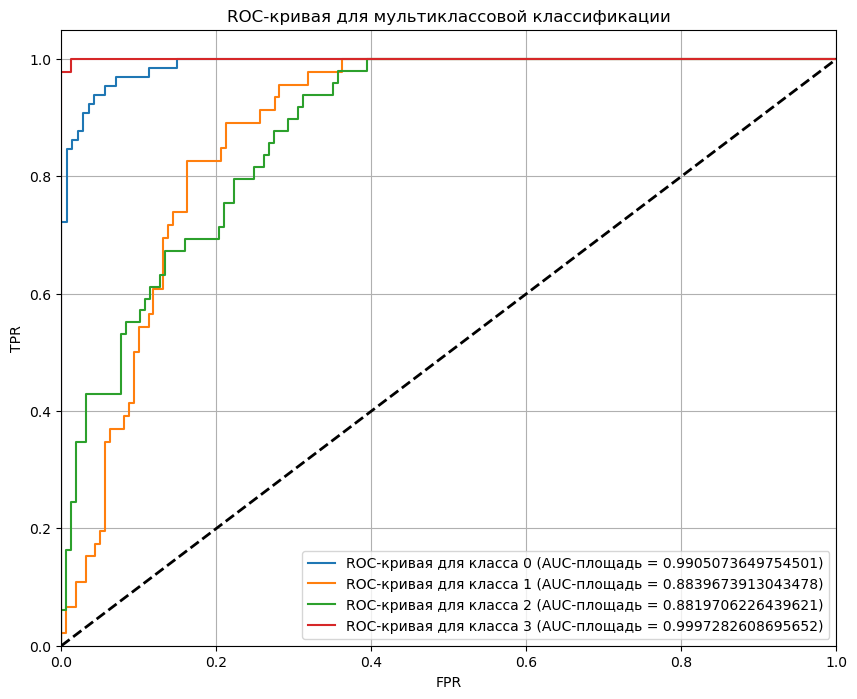

F1 на train: 0.8009
Accuracy на train: 0.7951
ROC-score на train: 0.9483


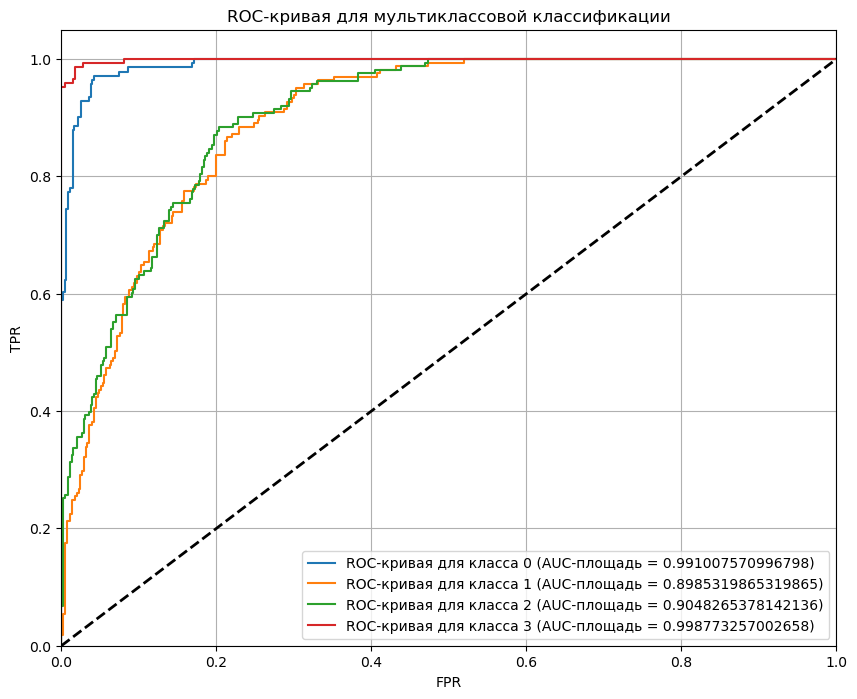

In [231]:
bag_pipe.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = bag_pipe.predict(X_test)
y_pred_proba = bag_pipe.predict_proba(X_test)

y_pred_train = bag_pipe.predict(X_train)
y_pred_proba_train = bag_pipe.predict_proba(X_train)

# Расчитаем метрики на подобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)
# Проверим на переобучение
metrics_estimation(
    y_train, y_pred_train, 
    y_pred_proba_train, label='train')

F1 на test: 0.7887
Accuracy на test: 0.8058
ROC-score на test: 0.9476


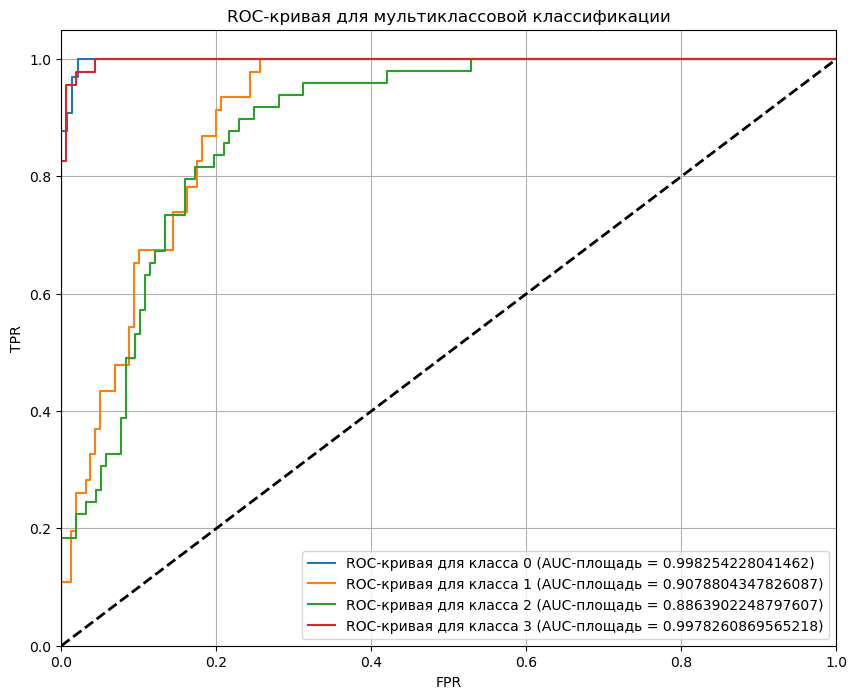

F1 на train: 1.0
Accuracy на train: 1.0
ROC-score на train: 1.0


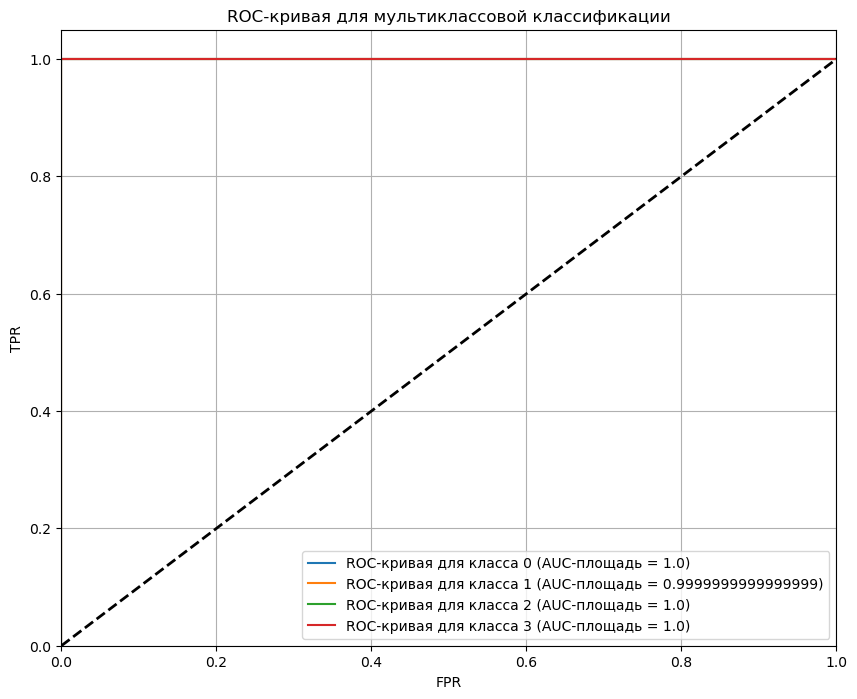

In [232]:
forest_pipe.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = forest_pipe.predict(X_test)
y_pred_proba = forest_pipe.predict_proba(X_test)

y_pred_train = forest_pipe.predict(X_train)
y_pred_proba_train = forest_pipe.predict_proba(X_train)

# Расчитаем метрики на подобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)
# Проверим на переобучение
metrics_estimation(
    y_train, y_pred_train, 
    y_pred_proba_train, label='train')